
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png" alt="Airbnb Logo" style="width:30%; height:auto;">







# **Guest Satisfaction Prediction Project**

## **Data Description**

**This project aims to assist Airbnb hosts in predicting the satisfaction level of guests booking their listings. By leveraging machine learning classification techniques, we seek to build a predictive model that categorizes guest satisfaction into three levels: *Very High*, *High*, and *Average*.**

**The model is trained on a dataset collected from the Airbnb platform, with `guest_satisfaction` as the target variable**

| Column                             | Description                                                  |
|------------------------------------|--------------------------------------------------------------|
| id                                 | Unique identifier for the listing.                           |
| listing_url                        | URL to the Airbnb listing.                                   |
| name                               | Title of the listing.                                        |
| summary                            | Short summary description provided by the host.              |
| space                              | Description of the space guests can access.                  |
| description                        | Full description of the listing.                             |
| neighborhood_overview              | Overview of the neighborhood.                                |
| notes                              | Additional notes from the host.                              |
| transit                            | Information about nearby transit options.                    |
| access                             | Details on guest access to the property.                     |
| interaction                        | Information on how hosts interact with guests.               |
| house_rules                        | House rules set by the host.                                 |
| thumbnail_url                      | Thumbnail image URL of the listing.                          |
| host_id                            | Unique identifier for the host.                              |
| host_url                           | URL to the host’s profile.                                   |
| host_name                          | Name of the host.                                            |
| host_since                         | Date the host joined Airbnb.                                 |
| host_location                      | Location of the host.                                        |
| host_about                         | Bio or description provided by the host.                     |
| host_response_time                 | Average time the host takes to respond.                      |
| host_response_rate                 | Percentage of messages responded to.                         |
| host_acceptance_rate              | Rate at which host accepts bookings.                         |
| host_is_superhost                  | Whether the host is a superhost.                             |
| host_neighbourhood                 | Host’s self-described neighborhood.                          |
| host_listings_count                | Number of listings the host has.                             |
| host_total_listings_count          | Total listings count (including inactive).                   |
| host_has_profile_pic               | Whether the host has a profile picture.                      |
| host_identity_verified             | Whether the host’s identity is verified.                     |
| street                             | Street address of the listing.                               |
| neighbourhood                      | Name of the local neighborhood.                              |
| neighbourhood_cleansed             | Cleaned or standardized neighborhood name.                   |
| city                               | City of the listing.                                         |
| state                              | State where the listing is located.                          |
| zipcode                            | Zip code of the listing.                                     |
| market                             | General market area.                                         |
| smart_location                     | Formatted location string.                                   |
| country_code                       | Country code.                                                |
| country                            | Full country name.                                           |
| latitude                           | Latitude of the listing.                                     |
| longitude                          | Longitude of the listing.                                    |
| is_location_exact                  | Whether the location is exact.                               |
| property_type                      | Type of property (e.g., apartment, house).                   |
| room_type                          | Type of room available.                                      |
| accommodates                       | Number of people the listing can accommodate.                |
| bathrooms                          | Number of bathrooms.                                         |
| bedrooms                           | Number of bedrooms.                                          |
| beds                               | Number of beds.                                              |
| bed_type                           | Type of bed.                                                 |
| amenities                          | List of included amenities.                                  |
| square_feet                        | Size of the listing in square feet.                          |
| nightly_price                      | Price per night.                                             |
| price_per_stay                     | Total price for a stay.                                      |
| security_deposit                   | Security deposit amount.                                     |
| cleaning_fee                       | Cleaning fee charged.                                        |
| guests_included                    | Number of guests included in base price.                     |
| extra_people                       | Extra charge for additional guests.                          |
| minimum_nights                     | Minimum nights required per booking.                         |
| maximum_nights                     | Maximum nights allowed per booking.                          |
| number_of_reviews                  | Total number of reviews.                                     |
| number_of_stays                    | Total number of stays.                                       |
| first_review                       | Date of the first review.                                    |
| last_review                        | Date of the most recent review.                              |
| guest_satisfaction               | Guest satisfaction level (target variable: Very High, High, Average).                      |
| requires_license                   | Whether a license is required.                               |
| instant_bookable                   | Whether guests can book instantly.                           |
| is_business_travel_ready           | Whether listing is ready for business travelers.             |
| cancellation_policy                | Policy on cancellations.                                     |
| require_guest_profile_picture      | Whether guest profile pictures are required.                 |
| require_guest_phone_verification   | Whether guest phone verification is required.                |

## **Data Overview**

### **Importing Libraries**

In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

import random
import os
seed = 0
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)



### **Data Exploration**

In [714]:
df = pd.read_csv("GuestSatisfactionPredictionMilestone2.csv")

In [715]:
df['guest_satisfaction'].value_counts()

guest_satisfaction
Very High    4188
Average      2546
High         1990
Name: count, dtype: int64

In [716]:
df.shape

(8724, 71)

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                8724 non-null   int64  
 1   listing_url                       8724 non-null   object 
 2   name                              8724 non-null   object 
 3   summary                           8724 non-null   object 
 4   space                             8724 non-null   object 
 5   description                       8724 non-null   object 
 6   neighborhood_overview             6490 non-null   object 
 7   notes                             5215 non-null   object 
 8   transit                           5975 non-null   object 
 9   access                            6011 non-null   object 
 10  interaction                       6164 non-null   object 
 11  house_rules                       6754 non-null   object 
 12  thumbn

In [718]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'nightly_price', 'price_per_stay', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',

In [719]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,guest_satisfaction,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
0,21514496,https://www.airbnb.com/rooms/21514496,PRIVATE BEDROOM DOWNTOWN 2 BED/ 2 BATH #5,Beautiful 2 bedroom 2 bathroom furnished apart...,Each apartment is fully furnished and consists...,Beautiful 2 bedroom 2 bathroom furnished apart...,NaN,***Note that the pictures on the website may o...,NaN,NaN,...,11/17/2017,Average,f,f,f,strict_14_with_grace_period,f,f,NaN,0
1,990185,https://www.airbnb.com/rooms/990185,4 bed/2 ba Family Retreat in SD,We feel our house is a great place for a famil...,Our house is ideal for large families or group...,We feel our house is a great place for a famil...,Neighborhood Mira Mesa is a culturally diverse...,NaN,NaN,Our guests may use the BBQ grill.,...,7/31/2019,High,f,f,f,moderate,f,f,NaN,0
2,19878244,https://www.airbnb.com/rooms/19878244,San Diego Dream Villa,"Zen, Luxury and the Best Location in Americas ...","San Diego Dream Villa, this unique and luxurio...","Zen, Luxury and the Best Location in Americas ...",This amazing house is located within a few min...,Im always available to make your trip experien...,"If you are bringing your car, remember that SD...",A couple of days before your arrival you will ...,...,7/16/2019,Very High,f,f,f,strict_14_with_grace_period,f,f,4.93,1
3,24561458,https://www.airbnb.com/rooms/24561458,Studio with Piazza View in Downtown Little Italy,Start the day with breakfast on the sunny pati...,"Newly built, this beautiful studio is located ...",Start the day with breakfast on the sunny pati...,"Spend the day at the zoo in Balboa Park, or ex...",The apartment is located on the Piazza Della F...,"MTS, Train, and Trolly are close by. The airpo...",You will not be sharing the apartment with any...,...,8/3/2019,Very High,f,t,f,moderate,f,f,NaN,0
4,32269829,https://www.airbnb.com/rooms/32269829,Beachside Retreat w/ Private Rooftop Deck w/ V...,This is a 2 bedroom/1 bathroom beachside unit...,Beach living at its finest! The highlight of ...,This is a 2 bedroom/1 bathroom beachside unit...,Mission Beach is an amazing coastal community ...,NaN,The Boardwalk and Bayside Walk are wonderful w...,This is a private home that is part of a typic...,...,6/30/2019,Very High,f,t,f,strict_14_with_grace_period,f,f,4.79,0


In [720]:
df.tail()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,guest_satisfaction,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
8719,34290139,https://www.airbnb.com/rooms/34290139,#5 Gaslamp Apartment home close to Conv Ctr.,"Located in the heart of the Gaslamp Quarter, t...",Classic fittings and furnishings in the kitche...,"Located in the heart of the Gaslamp Quarter, t...",- We have provided you with a GUEST MANUAL wit...,NaN,Everything in the area is available by walking...,NaN,...,8/5/2019,Very High,f,f,f,strict_14_with_grace_period,f,f,4.75,0
8720,11412129,https://www.airbnb.com/rooms/11412129,Mission Beach Condo Steps to Ocean and Bay,"Location does not get better. Steps to ocean, ...","Uniquely positioned close to Bay, Ocean, PB, M...","Location does not get better. Steps to ocean, ...",Mission Beach is a community built on a sandba...,The second bed is a full size blow up mattress...,On bus route and close to taxi stand across th...,"Wi-Fi, Netflix, Grill, Bikes, Coffee, Frisbee,...",...,9/17/2017,Average,f,f,f,moderate,f,f,4.40,0
8721,26169248,https://www.airbnb.com/rooms/26169248,Close to Downtown,Welcome to sunny San Diego in South Park. A cl...,Charming and comfortable!,Welcome to sunny San Diego in South Park. A cl...,We are close to everything! Lots of local bars...,Unit is stocked with all necessities. Kitchen ...,Parking on the street next to apartment. Uber/...,Use of entire apartment. Laundry facility on p...,...,7/21/2019,Very High,f,t,f,moderate,f,f,NaN,0
8722,29190854,https://www.airbnb.com/rooms/29190854,University of CA San Diego near La Jolla with TV,Luxury single family home near I-5 Freeway and...,"Your stay will include some high end touches, ...",Luxury single family home near I-5 Freeway and...,"Great weather year round, solar-powered pool, ...",NaN,Use your bikes in neighborhood and nearby cany...,1 private bedroom and 1 shared bath. 1 half ba...,...,6/9/2019,Average,f,t,f,strict_14_with_grace_period,f,f,4.80,0
8723,15535798,https://www.airbnb.com/rooms/15535798,Tropical Bay Park Home,"While we are out of town, we are offering the ...",Custom house built by a former boat-builder wi...,"While we are out of town, we are offering the ...",Quiet neighborhood. Walkable distance from a s...,Some notes on accessibility: The bed in the gu...,Lots of street parking. Most destinations requ...,"All of the first floor: 2 bedrooms, 1 bathroom...",...,7/30/2019,Very High,f,t,f,strict_14_with_grace_period,f,f,4.91,0


In [721]:
df.sample()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,guest_satisfaction,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
844,522108,https://www.airbnb.com/rooms/522108,Charming Craftsman in South Park,Enjoy time in a 100+ year old craftsman style ...,Thank you for looking at my home! Located on ...,Enjoy time in a 100+ year old craftsman style ...,My home is located in the beautiful neighborho...,Keegan (My therapy dog): Keegan typically goe...,The number 2 bus will take you downtown in 13 ...,While the house opens up to the backyard and g...,...,5/27/2019,Average,f,f,f,strict_14_with_grace_period,f,f,4.72,0


In [722]:
df.describe(exclude='object')

,id,thumbnail_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,host_rating,guest_favorite
count,8.724000e+03,0.0,8.724000e+03,0.0,8723.00000,8723.00000,8724.000000,8724.000000,8724.000000,8723.000000,8721.000000,8721.000000,106.000000,8724.000000,8724.000000,8724.000000,8724.000000,8724.000000,4521.000000,8724.000000
mean,2.061576e+07,NaN,7.217782e+07,NaN,36.63900,36.63900,32.767648,-117.181171,4.478450,1.477645,1.622176,2.383213,780.122642,2.385488,3.882164,612.218134,41.851674,83.703347,4.763599,0.070724
std,1.022036e+07,NaN,7.192548e+07,NaN,148.16393,148.16393,0.063700,0.064124,2.966026,0.867093,1.172510,1.854677,581.604721,2.309945,13.271263,1532.434921,63.566724,127.133448,0.171413,0.256379
min,6.000000e+00,NaN,2.900000e+01,NaN,0.00000,0.00000,32.531380,-117.281240,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.670000,0.000000
25%,1.331246e+07,NaN,1.281344e+07,NaN,1.00000,1.00000,32.725623,-117.245445,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,1.000000,29.000000,5.000000,10.000000,4.680000,0.000000
50%,2.122258e+07,NaN,4.407444e+07,NaN,2.00000,2.00000,32.756810,-117.168045,4.000000,1.000000,1.000000,2.000000,600.000000,1.000000,2.000000,365.000000,17.000000,34.000000,4.800000,0.000000
75%,2.896445e+07,NaN,1.148944e+08,NaN,9.00000,9.00000,32.797730,-117.139930,6.000000,2.000000,2.000000,3.000000,1000.000000,3.000000,3.000000,1125.000000,52.000000,104.000000,4.890000,0.000000
max,3.774504e+07,NaN,2.843016e+08,NaN,1737.00000,1737.00000,33.086070,-116.935990,24.000000,27.500000,10.000000,22.000000,3800.000000,24.000000,800.000000,99999.000000,641.000000,1282.000000,4.990000,1.000000


In [723]:
df.describe(exclude='number')

,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,extra_people,first_review,last_review,guest_satisfaction,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,8724,8724,8724,8724,8724,6490,5215,5975,6011,6164,...,8724,8724,8724,8724,8724,8724,8724,8724,8724,8724
unique,8724,8672,8162,8295,8389,5361,4424,5093,5245,4983,...,69,1892,880,3,1,2,1,6,2,2
top,https://www.airbnb.com/rooms/21514496,Home away from home,"Featured in The New York Times, The Wall Stree...",- Private balcony - In-suite laundry - Fully-e...,"Featured in The New York Times, The Wall Stree...",South Mission,We offer rewards and complimentary upgrades to...,"We recommend a car for navigating San Diego, b...",#NAME?,We are available to assist you with absolutely...,...,$0.00,7/21/2019,8/11/2019,Very High,f,t,f,strict_14_with_grace_period,f,f
freq,1,4,96,24,24,45,38,26,31,42,...,4441,75,541,4188,8724,4614,8724,4057,8483,8439


## **Data Preprocessing**

### **Checking duplicates**

`Checking duplicates on whole data`

In [724]:
df.duplicated().sum()

0

`Checking duplicates on id column`

In [725]:
df.duplicated(subset='id').sum()

0

### **Fixing numerical columns**

In [726]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

In [727]:

currency_columns = ['nightly_price', 'price_per_stay', 'extra_people', 'security_deposit', 'cleaning_fee']

for col in currency_columns:
    df[col] = df[col].str.replace(',', '').str.replace('$', '').astype(float)

In [728]:
df['zipcode']=df['zipcode'].str.replace("-", "")
df['zipcode']=df['zipcode'].astype(float)

### **Checking Nulls**

In [729]:
df.isnull().sum()

id                                     0
listing_url                            0
name                                   0
summary                                0
space                                  0
description                            0
neighborhood_overview               2234
notes                               3509
transit                             2749
access                              2713
interaction                         2560
house_rules                         1970
thumbnail_url                       8724
host_id                                0
host_url                               0
host_name                              1
host_since                             1
host_location                         14
host_about                          2462
host_response_time                  1057
host_response_rate                  1057
host_acceptance_rate                8724
host_is_superhost                      1
host_neighbourhood                  1232
host_listings_co

**Handling nulls using mode**

In [730]:
mode_fill_columns = ['market', 'host_neighbourhood', 'state', 'neighbourhood', 'host_location','host_response_time','zipcode','host_since','host_is_superhost','host_has_profile_pic','host_identity_verified','host_name']

for col in mode_fill_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

**Handling nulls using median**

`We chose to fill missing values using the median instead of the mean because the distribution of several columns showed skewness.`

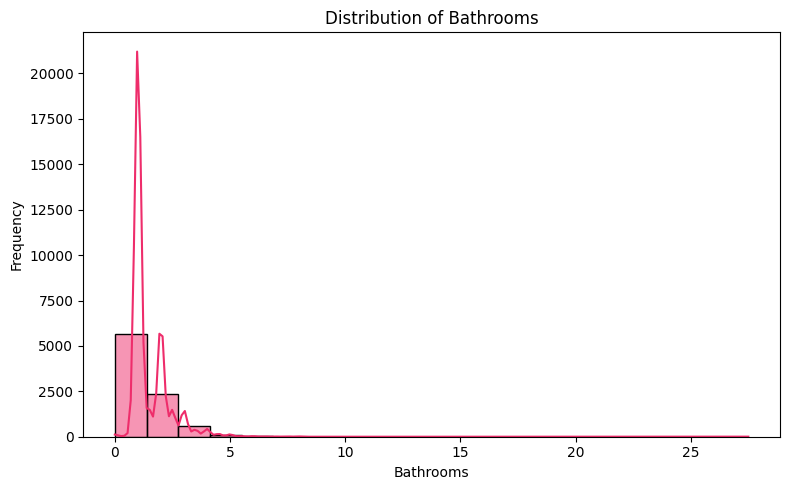

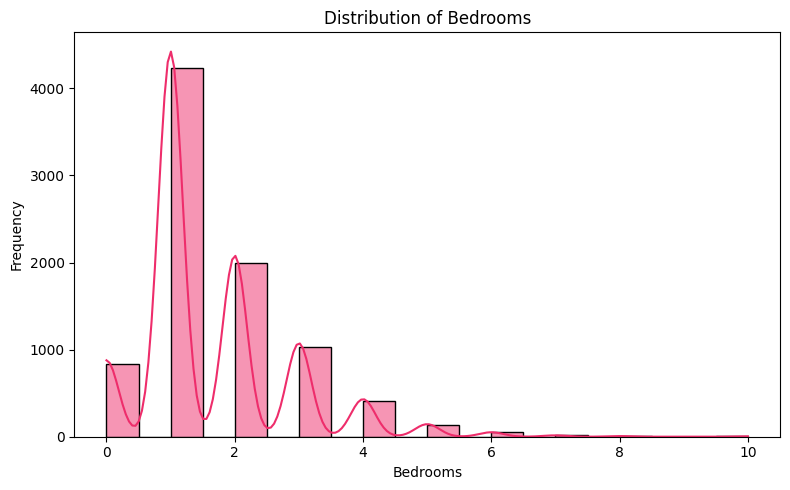

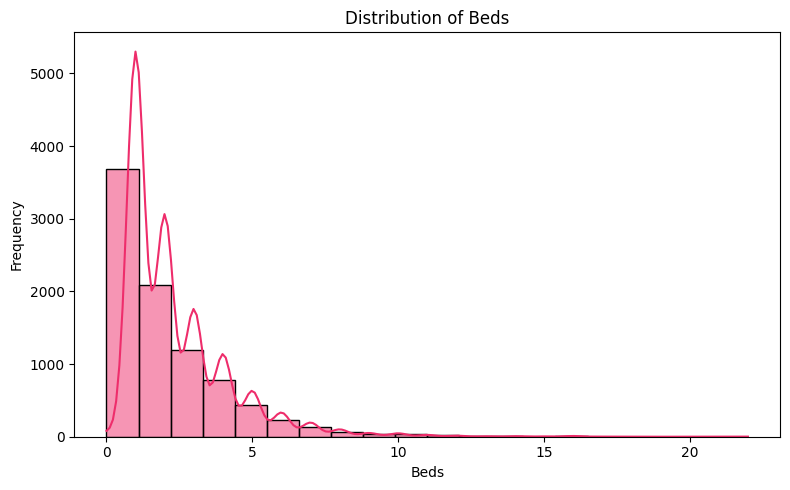

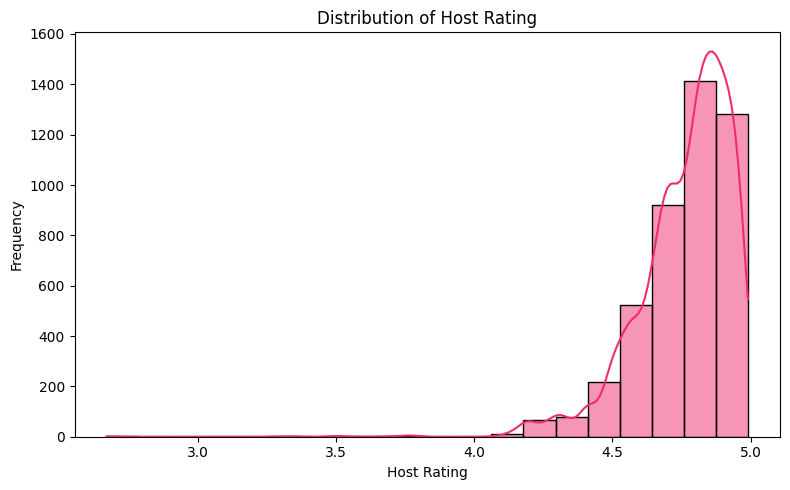

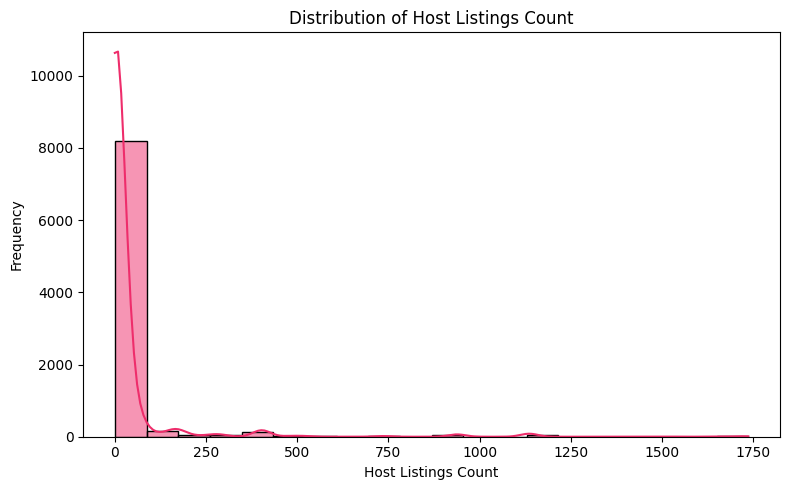

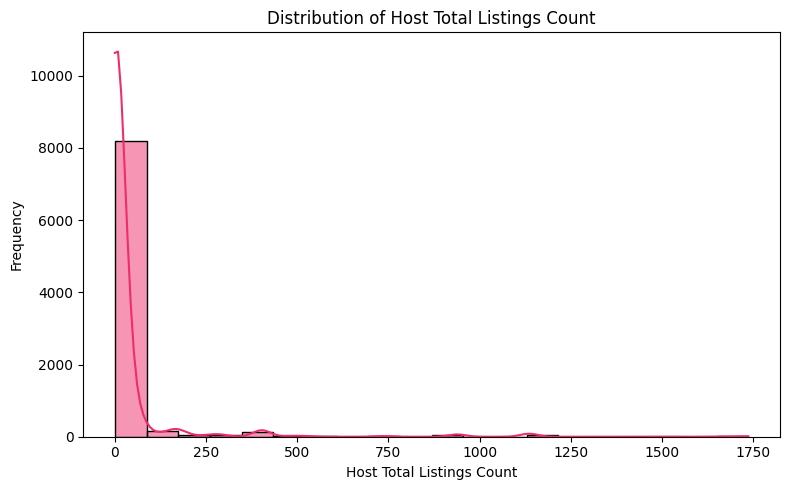

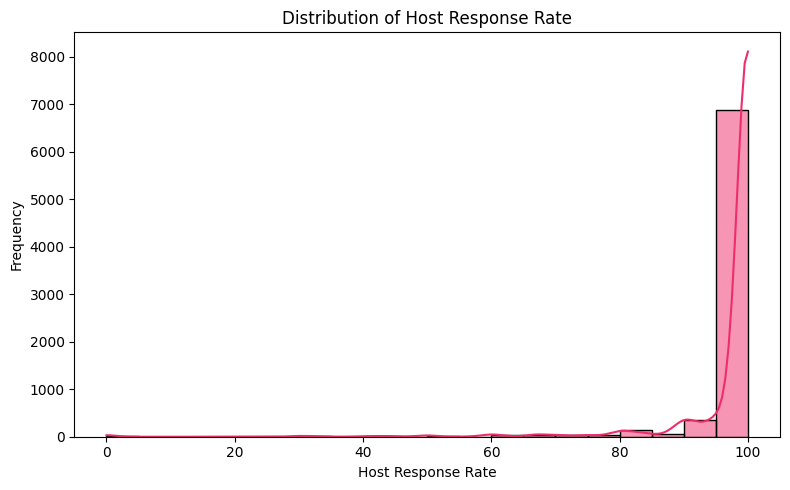

In [731]:
median_fill_columns = [
    'bathrooms', 'bedrooms', 'beds',
    'host_rating', 'host_listings_count', 'host_total_listings_count',
    'host_response_rate'
]

for col in median_fill_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color="#EE2D6B", edgecolor='black', bins=20)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [732]:
median_fill_columns = ['bathrooms', 'bedrooms', 'beds','host_rating','host_listings_count','host_total_listings_count','host_response_rate']

for col in median_fill_columns:
    df[col].fillna(df[col].median(), inplace=True)

**Handling nulls by filling it with zero**

For `security_deposit` and `cleaning_fee`, filling with `0` **made sense logically**, as the absence of a value likely indicates **no fee was required**.

In [733]:
df['security_deposit'].fillna(0,inplace=True)
df['cleaning_fee'].fillna(0,inplace=True)

**Handling nulls in text columns**

**1) Filling with Default Phrases**

 For other text fields such as `neighborhood_overview`, `notes`, `transit`, `access`, `interaction`, `house_rules`, and `host_about`, we filled missing values with default placeholders like `"No neighborhood info"` or `"No house rules"`.  
These placeholders indicate missing data without introducing misleading or artificial content, while still maintaining data consistency and structure.


In [734]:
df['neighborhood_overview'].fillna("No neighborhood info", inplace=True)
df['notes'].fillna("No notes", inplace=True)
df['transit'].fillna("No transit info", inplace=True)
df['access'].fillna("No access info", inplace=True)
df['interaction'].fillna("No interaction info", inplace=True)
df['house_rules'].fillna("No house rules", inplace=True)
df['host_about'].fillna("No host info", inplace=True)

**2) Text Generation using Cohere API**

For key descriptive fields like `space`, `description`, and `summary`, we used **Cohere's language generation capabilities** to generate meaningful replacements. This helped preserve the quality and completeness of listings where descriptive content is important.

In [735]:
# import cohere

# co = cohere.Client("juIYpQ3NwQHAyNnlwcLeCzjZGa9tHZUvgj24TL3V")

# def generate_summary(row):
#     if pd.notnull(row['summary']):
#         return row['summary']

#     prompt = f"Write a cozy and inviting one-sentence summary for a {row['bedrooms']}-bedroom place in the {row['smart_location']} with {row['amenities']}."

#     response = co.generate(
#         model='command',
#         prompt=prompt,
#         max_tokens=60,
#         temperature=0.7,
#     )

#     return response.generations[0].text.strip()

# df['summary'] = df.apply(generate_summary, axis=1)

# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)

In [736]:
# import cohere
# co = cohere.Client("h2W3WCDLhT6df3h4ksISWtTIqvRbPfCGAQuf07gA")

# def generate_description(row):
#     if pd.notnull(row['description']):
#         return row['description']

#     prompt = f"""Write a cozy, detailed, and inviting property description for a rental listing.
# It should describe a {row['bedrooms']}-bedroom place located in {row['smart_location']} with the following amenities: {row['amenities']}.
# Highlight features like living spaces, kitchen equipment, outdoor areas, and anything that would make a guest feel at home."""

#     response = co.generate(
#         model='command',
#         prompt=prompt,
#         max_tokens=250,
#         temperature=0.7,
#     )

#     return response.generations[0].text.strip()


# df['description'] = df.apply(generate_description, axis=1)

# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)


In [737]:
# import cohere
# import pandas as pd

# # Define two cohere clients with different trial keys
# co1 = cohere.Client("yFsJR6NCZmgyJ9KCc1FkjrFt0BOkIXnOnrDDY9R6")  # First API key


# def generate_summary(row):
#     if pd.notnull(row['space']):
#         return row['space']

#     prompt = f"Write a detailed and inviting description of a {row['bedrooms']}-bedroom home in the {row['neighbourhood_cleansed']} neighborhood of {row['city']}, located in {row['smart_location']}. The home features {row['amenities']}. Highlight the house's size, layout, and any special features that make it ideal for families, groups, or individuals."

#     # Try the first API key, then switch to the second if it fails

#     response = co1.generate(
#             model='command',
#             prompt=prompt,
#             max_tokens=150,
#             temperature=0.7,
#         )


#     return response.generations[0].text.strip()

# df['space'] = df.apply(generate_summary, axis=1)
# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)


In [738]:
df.isnull().sum()

id                                     0
listing_url                            0
name                                   0
summary                                0
space                                  0
description                            0
neighborhood_overview                  0
notes                                  0
transit                                0
access                                 0
interaction                            0
house_rules                            0
thumbnail_url                       8724
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                          0
host_about                             0
host_response_time                     0
host_response_rate                     0
host_acceptance_rate                8724
host_is_superhost                      0
host_neighbourhood                     0
host_listings_co

### **Flooring Columns**

For the numeric columns `bathrooms`, `bedrooms`, and `beds`, we applied a floor operation to round down the values as fractional values for those columns don't have meaningful interpretations.

In [739]:
numeric_columns = ['bathrooms', 'bedrooms', 'beds']

for col in numeric_columns:
    df[col] = np.floor(df[col]).astype(int)

### **Text Processing**

#### **1) Text Cleaning**  

In [ ]:
df['summary'].iloc[8722]

In [741]:
text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = (
        df[col]
        .str.lower() # lowercasing
        .str.replace(r"http\S+|www\S+|[\w\.-]+@[\w\.-]+", "", regex=True)  # remove URLs & emails
        .str.replace(r"<.*?>", "", regex=True)  # remove HTML tags
        .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)  # remove punctuation & special chars
        .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces
        .str.strip()  # trim leading/trailing spaces
    )


In [ ]:
df['summary'].iloc[8722]

#### **2) Handling Contractions**  

In [743]:
contractions_dict = {
    "isn’t": " is not",
    "don’t": " do not",
    "aren’t": " are not",
    "can’t": " cannot",
    "couldn’t": " could not",
    "didn’t": " did not",
    "’ve": " have",
    "’d": " would",
    "u": " you",
    "’m": " am",
    "’ll":" will",
    "’re": " are",
    "won’t": " will not"

}

def expand_contractions(text):
    for contraction, expansion in contractions_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expansion, text)
    return text

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(expand_contractions)

In [ ]:
df['summary'].iloc[8722]

#### **3) Tokenization** 

In [745]:
from nltk.tokenize import word_tokenize

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(word_tokenize)

#### **4) Removing Stop words** 

In [746]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(remove_stop_words)

In [747]:
df.iloc[:5,5].to_frame()

,description
0,"[beautiful, 2, bedroom, 2, bathroom, furnished..."
1,"[feel, house, great, place, family, relax, unw..."
2,"[zen, luxury, best, location, americas, finest..."
3,"[start, day, breakfast, sunny, patio, overlook..."
4,"[2, bedroom1, bathroom, beachside, unit, locat..."


#### **5) Lemmatization** 

In [748]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']

for col in text_columns:
    df[col] = df[col].apply(lemma)

In [749]:
df.iloc[:5,3].to_frame()

,summary
0,"[beautiful, 2, bedroom, 2, bathroom, furnished..."
1,"[feel, house, great, place, family, relax, unw..."
2,"[zen, luxury, best, location, america, finest,..."
3,"[start, day, breakfast, sunny, patio, overlook..."
4,"[2, bedroom1, bathroom, beachside, unit, locat..."


#### **6) Text Vectorization using Tfidf** 

In [750]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['summary'] = df['summary'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['space'] = df['space'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['description'] = df['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['notes'] = df['notes'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['transit'] = df['transit'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['access'] = df['access'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['house_rules'] = df['house_rules'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [751]:
# summary
summary_tfidf = TfidfVectorizer(max_features=1000)
summary_features = summary_tfidf.fit_transform(df['summary'])
summary_tfidf_df = pd.DataFrame(summary_features.toarray(), columns=[f"summary_{f}" for f in summary_tfidf.get_feature_names_out()])

# space
space_tfidf = TfidfVectorizer(max_features=1000)
space_features = space_tfidf.fit_transform(df['space'])
space_tfidf_df = pd.DataFrame(space_features.toarray(), columns=[f"space_{f}" for f in space_tfidf.get_feature_names_out()])


# description
description_tfidf = TfidfVectorizer(max_features=1000)
description_features = description_tfidf.fit_transform(df['description'])
description_tfidf_df = pd.DataFrame(description_features.toarray(), columns=[f"description_{f}" for f in description_tfidf.get_feature_names_out()])

# notes
notes_tfidf = TfidfVectorizer(max_features=1000)
notes_features = notes_tfidf.fit_transform(df['notes'])
notes_tfidf_df = pd.DataFrame(notes_features.toarray(), columns=[f"notes_{f}" for f in notes_tfidf.get_feature_names_out()])


# transit
transit_tfidf = TfidfVectorizer(max_features=1000)
transit_features = transit_tfidf.fit_transform(df['transit'])
transit_tfidf_df = pd.DataFrame(transit_features.toarray(), columns=[f"transit_{f}" for f in transit_tfidf.get_feature_names_out()])


# access
access_tfidf = TfidfVectorizer(max_features=1000)
access_features = access_tfidf.fit_transform(df['access'])
access_tfidf_df = pd.DataFrame(access_features.toarray(), columns=[f"access_{f}" for f in access_tfidf.get_feature_names_out()])


# house_rules
house_rules_tfidf = TfidfVectorizer(max_features=1000)
house_rules_features = house_rules_tfidf.fit_transform(df['house_rules'])
house_rules_tfidf_df = pd.DataFrame(house_rules_features.toarray(), columns=[f"house_rules_{f}" for f in house_rules_tfidf.get_feature_names_out()])



#### **7) Dimensionality Reduction using SVD** 

In [752]:
from sklearn.decomposition import TruncatedSVD

svd_summary = TruncatedSVD(n_components=50, random_state=0)
svd_space = TruncatedSVD(n_components=50, random_state=0)
svd_transit = TruncatedSVD(n_components=50, random_state=0)
svd_access = TruncatedSVD(n_components=50, random_state=0)
svd_description = TruncatedSVD(n_components=50, random_state=0)
svd_notes = TruncatedSVD(n_components=50, random_state=0)
svd_house_rules = TruncatedSVD(n_components=50, random_state=0)

In [753]:
summary_svd_df = pd.DataFrame(svd_summary.fit_transform(summary_features), columns=[f"summary_svd_{i}" for i in range(50)])
space_svd_df = pd.DataFrame(svd_space.fit_transform(space_features), columns=[f"space_svd_{i}" for i in range(50)])
transit_svd_df = pd.DataFrame(svd_transit.fit_transform(transit_features), columns=[f"transit_svd_{i}" for i in range(50)])
access_svd_df = pd.DataFrame(svd_access.fit_transform(access_features), columns=[f"access_svd_{i}" for i in range(50)])
description_svd_df = pd.DataFrame(svd_description.fit_transform(description_features), columns=[f"description_svd_{i}" for i in range(50)])
notes_svd_df = pd.DataFrame(svd_notes.fit_transform(notes_features), columns=[f"notes_svd_{i}" for i in range(50)])
house_rules_svd_df = pd.DataFrame(svd_house_rules.fit_transform(house_rules_features), columns=[f"house_rules_svd_{i}" for i in range(50)])

In [754]:
df.reset_index(drop=True, inplace=True)
df = pd.concat([
    df,
    summary_svd_df,
    space_svd_df,
    transit_svd_df,
    access_svd_df,
    description_svd_df,
    notes_svd_df,
    house_rules_svd_df
], axis=1)

In [755]:
df.shape

(8724, 421)

### **Sentiment Analysis**

`Calculating sentiment score using TextBlob`

In [756]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in ['interaction','host_about','neighborhood_overview','name']:
    df[column] = df[column].apply(get_sentiment)

df[['interaction','host_about','neighborhood_overview','name']].head(5)

,interaction,host_about,neighborhood_overview,name
0,0.0700,0.000000,0.000000,0.0000
1,0.1375,0.250000,0.163333,0.0000
2,0.5000,0.341473,0.308102,0.0000
3,0.4000,0.000000,0.290625,-0.1875
4,-0.0500,0.175000,0.148760,0.0000


### **Standardizing Short Text Columns**

In [757]:
columns_to_standardize = [
    'host_name', 'host_location', 'host_neighbourhood',
    'street', 'neighbourhood', 'neighbourhood_cleansed',
    'city', 'state', 'market', 'smart_location', 'country_code','country','property_type','room_type'
]
for col in columns_to_standardize:
    df[col] = df[col].str.lower().str.strip()

### **Encoding**

#### **Label Encoder**

In [ ]:
label_encoders = {}

columns_to_encode = [
    'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed',
    'city', 'state', 'market', 'smart_location', 'country_code', 'country',
    'property_type', 'room_type', 'host_name'
]

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le     


#### **Binary Mapping of Boolean Columns**

In [759]:
columns_to_map = [
    'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
    'requires_license', 'instant_bookable', 'is_business_travel_ready',
    'require_guest_phone_verification', 'host_is_superhost'
]
mapping_dict = {'t': 1, 'f': 0}
for col in columns_to_map:
    df[col] = df[col].map(mapping_dict)

the `require_guest_profile_picture` column is transformed by reversing the typical boolean mapping, where `'t'` (true) is mapped to `0` and `'f'` (false) is mapped to `1`. This reversed mapping was chosen because we found it better **not to ask for a guest profile picture**

In [760]:
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].map({'t': 0, 'f': 1})


#### **Mapping Categorical Data to Numeric Values with Rank (Higher is Better)**

In [761]:
guest_satisfaction_mapping={
    'Very High':2,
    'High':1,
    'Average':0,
}
df['guest_satisfaction'] = df['guest_satisfaction'].map(guest_satisfaction_mapping)

In [762]:
response_mapping = {
    'within an hour': 3,
    'within a few hours': 2,
    'within a day': 1,
    'a few days or more': 0
}
df['host_response_time'] = df['host_response_time'].map(response_mapping)


In [763]:
bed_rank = {
    'Airbed': 0,
    'Couch': 1,
    'Futon': 2,
    'Pull-out Sofa': 3,
    'Real Bed': 4
}

df['bed_type'] = df['bed_type'].map(bed_rank)


In [764]:
cancellation_rank = {
    'flexible': 5,
    'moderate': 4,
    'strict': 3,
    'strict_14_with_grace_period': 2,
    'super_strict_30': 1,
    'super_strict_60': 0
}

df['cancellation_policy'] = df['cancellation_policy'].map(cancellation_rank)


### **Handling Outliers using IQR method**

In [765]:
outliers_cols = [
    'host_total_listings_count','host_listings_count',
    "latitude", "longitude",
    "accommodates", "bathrooms", "bedrooms", "beds",
    "guests_included", "minimum_nights",
    "maximum_nights", "number_of_reviews", "number_of_stays"
]


In [766]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in host_total_listings_count is : 1301
The number of outliers in host_listings_count is : 1301
The number of outliers in latitude is : 521
The number of outliers in longitude is : 46
The number of outliers in accommodates is : 179
The number of outliers in bathrooms is : 219
The number of outliers in bedrooms is : 627
The number of outliers in beds is : 317
The number of outliers in guests_included is : 504
The number of outliers in minimum_nights is : 629
The number of outliers in maximum_nights is : 4
The number of outliers in number_of_reviews is : 755
The number of outliers in number_of_stays is : 755


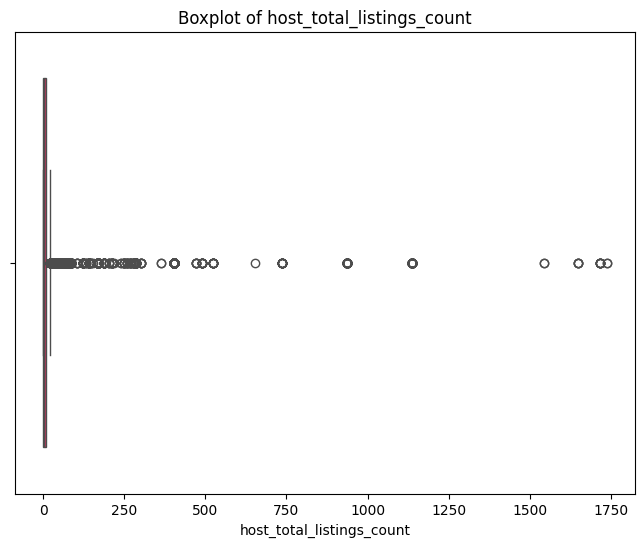

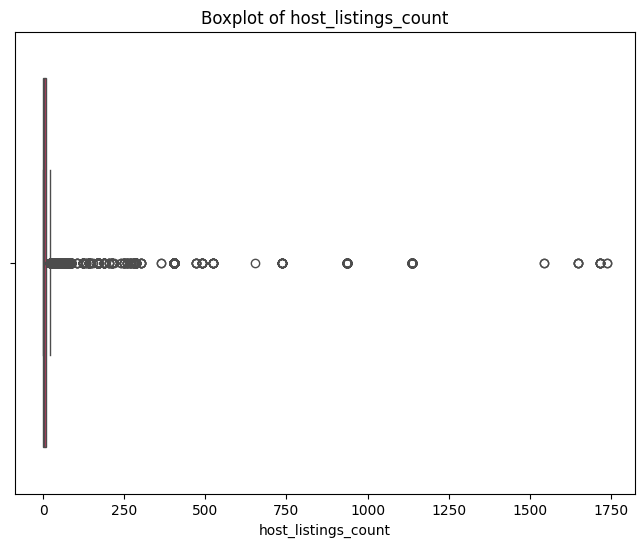

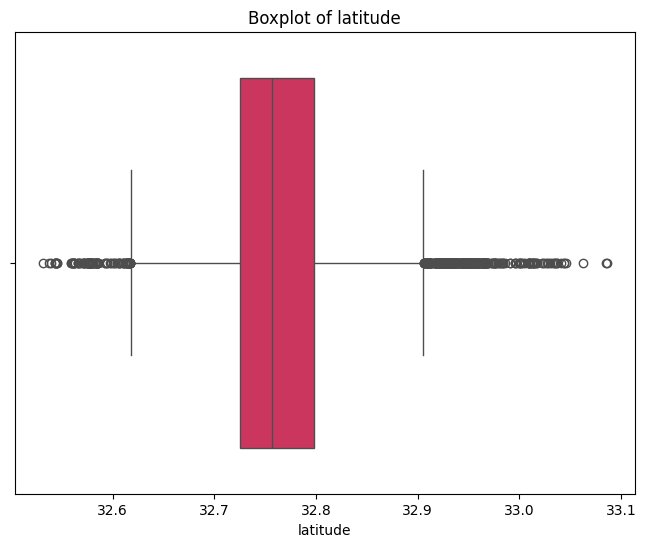

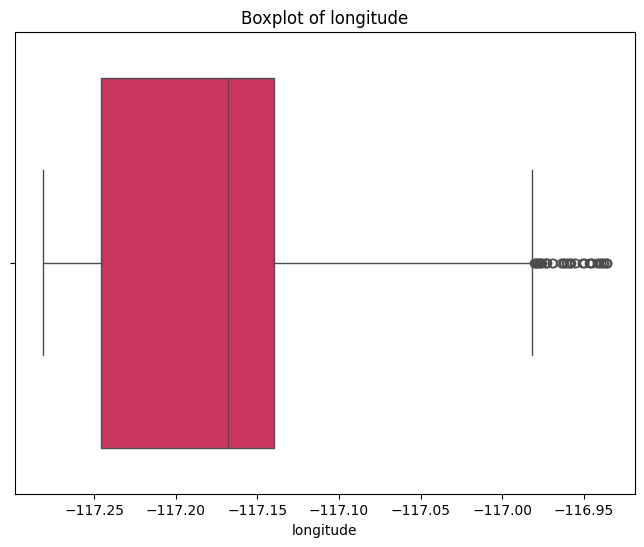

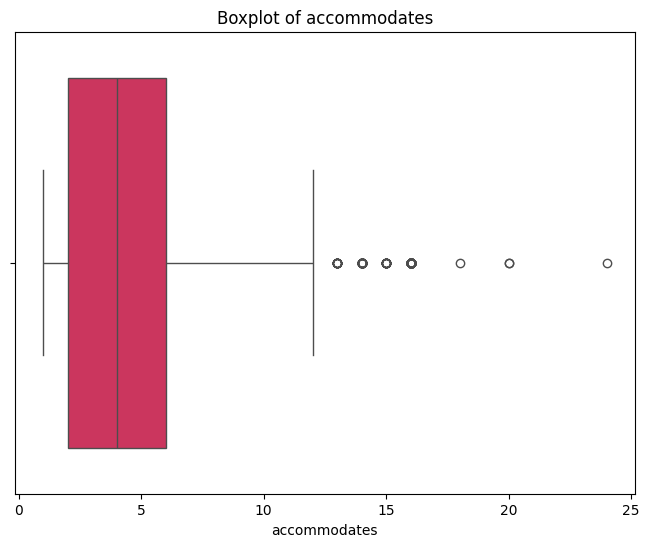

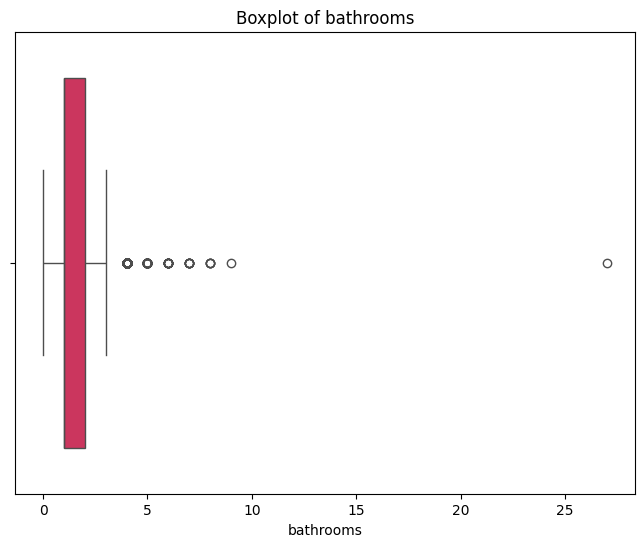

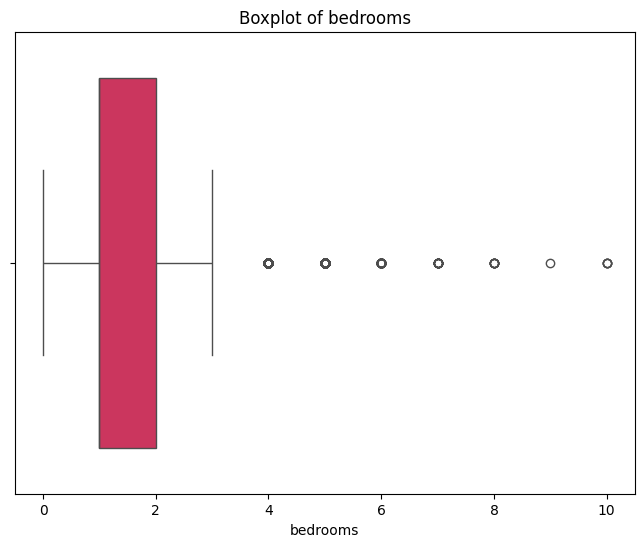

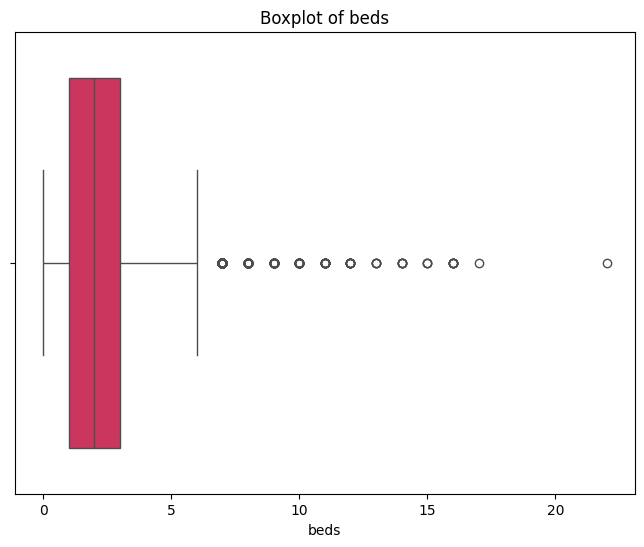

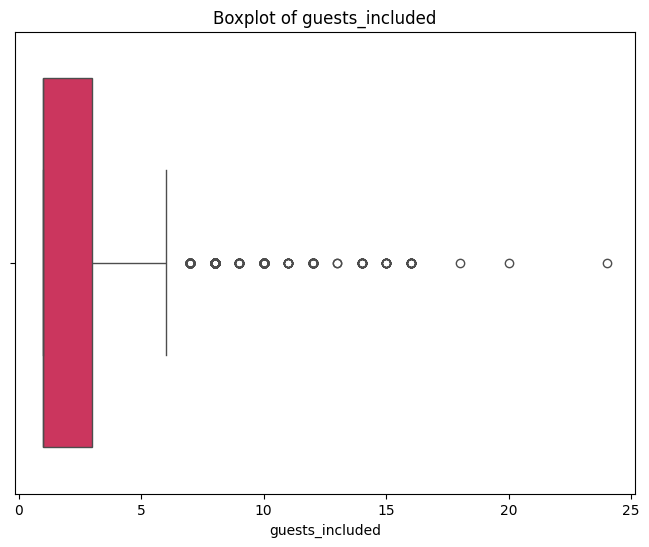

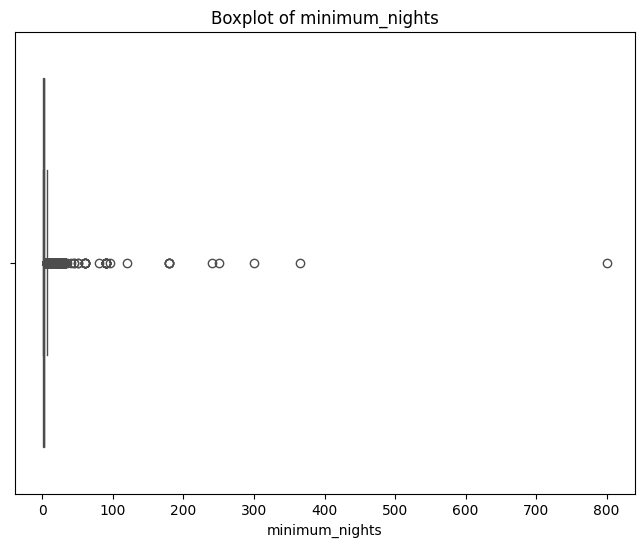

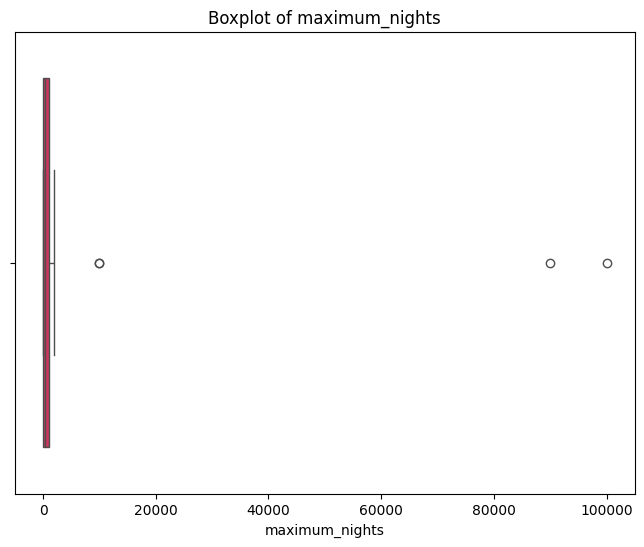

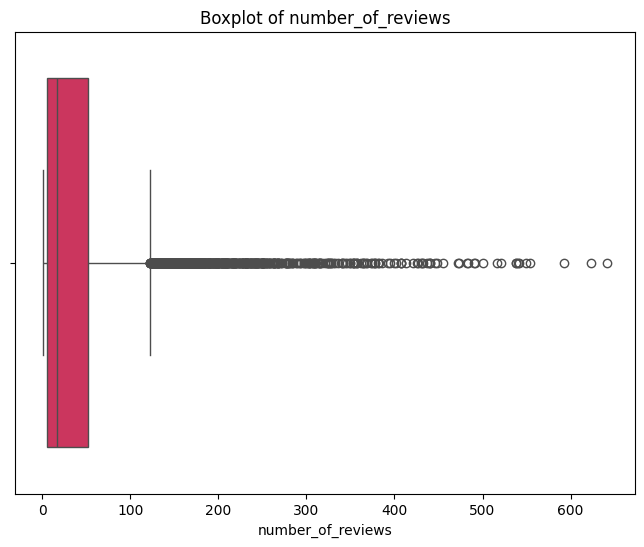

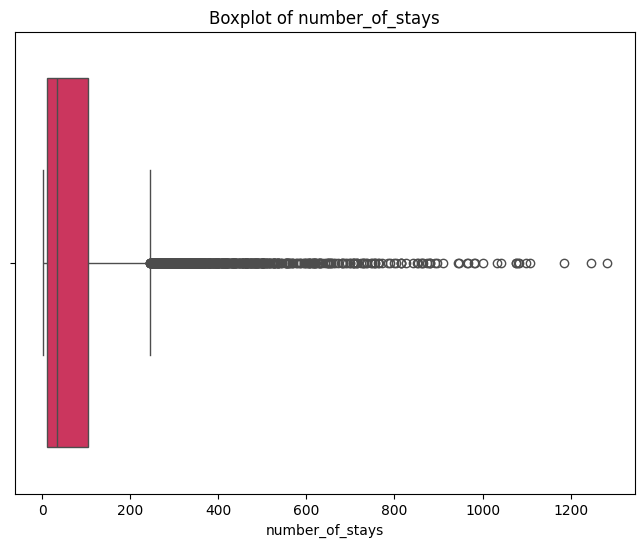

In [767]:
for col in outliers_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col], palette=["#E41D53"])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [768]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  df[col] = np.where(df[col] < (q1 - norm_range), q1 - norm_range, df[col])
  df[col] = np.where(df[col] > (q3 + norm_range), q3 + norm_range, df[col])

In [769]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in host_total_listings_count is : 0
The number of outliers in host_listings_count is : 0
The number of outliers in latitude is : 0
The number of outliers in longitude is : 0
The number of outliers in accommodates is : 0
The number of outliers in bathrooms is : 0
The number of outliers in bedrooms is : 0
The number of outliers in beds is : 0
The number of outliers in guests_included is : 0
The number of outliers in minimum_nights is : 0
The number of outliers in maximum_nights is : 0
The number of outliers in number_of_reviews is : 0
The number of outliers in number_of_stays is : 0


## **Feature Engineering**

### **Web Scraping**

#### **Using Beautiful Soup**

We extracted host ratings from `host_url` column and stores the ratings in the `host_rating` column of and saved it in main csv file

In [770]:
# import requests
# from bs4 import BeautifulSoup
# import re
# import pandas as pd

# # Let's assume df is already loaded with the 'host_url' column

# def get_host_rating_with_progress(url, idx, total):
#     try:
#         headers = {
#             'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
#         }
#         response = requests.get(url, headers=headers, timeout=10)

#         if response.status_code != 200:
#             print(f"[{idx}/{total}] ❌ Failed to access {url}")
#             return None

#         soup = BeautifulSoup(response.content, 'html.parser')

#         rating_span = soup.find('span', string=re.compile(r'(\d+\.\d+)\s+Rating'))

#         if rating_span:
#             rating_text = rating_span.get_text()
#             match = re.search(r'\d+\.\d+', rating_text)
#             if match:
#                 rating_value = float(match.group())
#                 print(f"[{idx}/{total}] ✅ Found rating {rating_value} for {url}")
#                 return rating_value
#             else:
#                 print(f"[{idx}/{total}] ❌ Rating format mismatch for {url}")
#         else:
#             print(f"[{idx}/{total}] ❌ Rating not found for {url}")

#         return None

#     except Exception as e:
#         print(f"[{idx}/{total}] ⚠️ Error scraping {url}: {e}")
#         return None

# # Apply function with index tracking
# total_urls = len(df)
# df['host_rating'] = [
#     get_host_rating_with_progress(url, idx+1, total_urls)
#     for idx, url in enumerate(df['host_url'])
# ]

# output_file = "GuestSatisfactionPrediction.csv"
# df.to_csv(output_file, index=False)

# print(f"✅ Updated data saved to {output_file}")



#### **Using Selenium**

We extracted guest favourite labels from `listing_url` column and stores the ratings in the `guest_favorite` column of and saved it in main csv file

In [771]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.by import By
# import pandas as pd
# import time

# # Setup headless Chrome
# options = Options()
# options.add_argument("--headless")
# options.add_argument("--no-sandbox")
# options.add_argument("--disable-dev-shm-usage")

# driver = webdriver.Chrome(options=options)

# def has_guest_favorite(url, idx, total):
#     try:
#         driver.get(url)
#         time.sleep(3)


#         try:
#             driver.find_element(By.CSS_SELECTOR, "[data-section-id='TITLE_DEFAULT']")
#             listing_page = True
#         except:
#             listing_page = False

#         if not listing_page:
#             print(f"[{idx}/{total}] ⚠️ Not a listing page (likely redirected to homepage) for {url}")
#             return 0

#         # Now check for Guest favorite
#         try:
#             guest_fav = driver.find_element(By.XPATH, "//div[contains(text(),'Guest favorite')]")
#             print(f"[{idx}/{total}] ✅ 'Guest favorite' FOUND for {url}")
#             return 1
#         except:
#             print(f"[{idx}/{total}] ❌ 'Guest favorite' NOT FOUND for {url}")
#             return 0

#     except Exception as e:
#         print(f"[{idx}/{total}] ⚠️ Error scraping {url}: {e}")
#         return None

# # Apply function with index tracking
# total_urls = len(df)
# df['guest_favorite'] = [
#     has_guest_favorite(url, idx+1, total_urls)
#     for idx, url in enumerate(df['listing_url'])
# ]

# driver.quit()

# output_file = "GuestSatisfactionPrediction.csv"
# df.to_csv(output_file, index=False)

# print(f"✅ Updated data saved to {output_file}")


### **Dividing amenities into categories**

We cleaned and parsed the `amenities` column, extracted all individual items, and grouped them into meaningful categories (e.g., Essentials, Safety, Luxury). For each listing, we counted how many amenities belong to each category and added these counts as new features to the dataset.

In [772]:
all_amenities = set()

for amenities in df['amenities']:
    amenities = amenities.strip()
    if amenities.startswith("{") and amenities.endswith("}"):
        amenities = amenities[1:-1] 

    items = [item.strip().strip('"').strip("'") for item in amenities.split(",")]
    all_amenities.update(items)

for amenity in sorted(all_amenities):
    print(amenity)


24-hour check-in
Accessible-height bed
Accessible-height toilet
Air conditioning
Air purifier
Alfresco bathtub
Amazon Echo
BBQ grill
Baby bath
Baby monitor
Babysitter recommendations
Balcony
Bath towel
Bathroom essentials
Bathtub
Bathtub with bath chair
Beach essentials
Beach view
Beachfront
Bed linens
Bedroom comforts
Bidet
Body soap
Breakfast
Breakfast table
Building staff
Buzzer/wireless intercom
Cable TV
Carbon monoxide detector
Cat(s)
Ceiling fan
Central air conditioning
Changing table
Children’s books and toys
Children’s dinnerware
Cleaning before checkout
Coffee maker
Convection oven
Cooking basics
Crib
DVD player
Day bed
Disabled parking spot
Dishes and silverware
Dishwasher
Dog(s)
Doorman
Double oven
Dryer
EV charger
Electric profiling bed
Elevator
En suite bathroom
Espresso machine
Essentials
Ethernet connection
Exercise equipment
Extra pillows and blankets
Extra space around bed
Family/kid friendly
Fax machine
Fire extinguisher
Fire pit
Fireplace guards
Firm mattress
First 

In [773]:
amenities_dict = {
    "Essentials": [
        "Essentials", "Bath towel", "Bathroom essentials", "Bed linens", "Bedroom comforts",
        "Body soap", "Cooking basics", "Dishes and silverware", "Hangers", "Heating",
        "Hot water", "Internet", "Shampoo", "Toilet paper", "Wifi", "TV", "Cleaning before checkout",
        "Ethernet connection", "Hair dryer", "Hot water kettle", "toilet"
    ],
    "Safety": [
        "Carbon monoxide detector", "Fire extinguisher", "First aid kit", "Safety card",
        "Smoke detector", "Window guards", "Buzzer/wireless intercom",
        "Lock on bedroom door", "Doorman", "Smart lock", "Keypad", "Fireplace guards"
    ],
    "Luxury": [
        "Air purifier", "Alfresco bathtub", "En suite bathroom", "Espresso machine", "Firm mattress",
        "Heated floors", "Heated towel rack", "Hot tub", "Jetted tub", "Memory foam mattress",
        "Pillow-top mattress", "Private hot tub", "Private pool", "Rain shower", "Sauna",
        "Soaking tub", "Sound system", "Stand alone steam shower", "Sun loungers", "Wine cooler",
        "Building staff", "Day bed", "Host greets you", "Indoor fireplace", "Luggage dropoff allowed",
        "Private bathroom", "Private entrance", "Private living room", "Room-darkening shades",
        "Suitable for events", "Ski-in/Ski-out", "Smoking allowed"
    ],
    "Accessibility": [
        "24-hour check-in", "Accessible-height bed", "Accessible-height toilet", "Disabled parking spot",
        "Electric profiling bed", "Elevator", "Extra space around bed", "Flat path to guest entrance",
        "Ground floor access", "Handheld shower head", "No stairs or steps to enter",
        "Pool with pool hoist", "Roll-in shower", "Shower chair", "Single level home",
        "Well-lit path to entrance", "Wheelchair accessible", "Wide clearance to shower",
        "Wide doorway to guest bathroom", "Wide entrance", "Wide entrance for guests",
        "Wide entryway", "Wide hallways", "Fixed grab bars for shower", "Fixed grab bars for toilet",
        "Bathtub with bath chair"
    ],
    "Outdoor": [
        "BBQ grill", "Balcony", "Beach essentials", "Beach view", "Beachfront",
        "Free parking on premises", "Free street parking", "Garden or backyard", "Hammock",
        "Lake access", "Mountain view", "Outdoor kitchen", "Outdoor parking",
        "Outdoor seating", "Patio or balcony", "Terrace", "Waterfront", "Tennis court",
        "Pool", "Pool toys", "Fire pit"
    ],
    "Child & Family-Friendly": [
        "Baby bath", "Baby monitor", "Babysitter recommendations", "Changing table",
        "Children's books and toys", "Children's dinnerware", "Crib", "Family/kid friendly",
        "High chair", "Outlet covers", "Pack 'n Play/travel crib", "Stair gates",
        "Table corner guards", "Other pet(s)", "Pets allowed", "Cat(s)", "Dog(s)", "Pets live on this property"
    ],
    "Entertainment": [
        "Amazon Echo", "Cable TV", "DVD player", "Game console", "HBO GO",
        "Netflix", "Projector and screen", "Smart TV"
    ],
    "Home Appliances": [
        "Air conditioning", "Ceiling fan", "Central air conditioning", "Coffee maker",
        "Convection oven", "Dishwasher", "Dryer", "EV charger", "Exercise equipment",
        "Fax machine", "Full kitchen", "Gas oven", "Gym", "High-resolution computer monitor",
        "Kitchen", "Kitchenette", "Laptop friendly workspace", "Lockbox", "Long term stays allowed",
        "Microwave", "Mini fridge", "Murphy bed", "Oven", "Paid parking off premises",
        "Paid parking on premises", "Printer", "Refrigerator", "Stove", "Washer",
        "Warming drawer", "Pocket wifi", "Shared gym", "Shared hot tub", "Shared pool",
        "Self check-in", "Extra pillows and blankets", "Formal dining area", "Standing valet",
        "Iron", "Double oven", "Heat lamps", "Breakfast", "Breakfast table", "Bidet"
    ]
}


In [774]:
amenity_to_category = {}
for category, amenities in amenities_dict.items():
    for amenity in amenities:
        amenity_to_category[amenity] = category

all_categories = list(amenities_dict.keys())

In [775]:
from collections import defaultdict
def categorize_amenities(amenities_str):
    if pd.isna(amenities_str):
        amenities = []
    else:
        amenities_str = amenities_str.strip()
        if amenities_str.startswith("{") and amenities_str.endswith("}"):
            amenities_str = amenities_str[1:-1] 
        amenities = [item.strip().strip('"').strip("'") for item in amenities_str.split(",")]

    counts = defaultdict(int)
    for amenity in amenities:
        if amenity:  
            category = amenity_to_category.get(amenity)
            if category:
                counts[category] += 1

    full_counts = {cat: counts.get(cat, 0) for cat in all_categories}
    return pd.Series(full_counts)

In [776]:
category_counts_df = df["amenities"].apply(categorize_amenities)

df = pd.concat([df, category_counts_df], axis=1)

In [777]:
df[['amenities','Essentials','Safety','Luxury','Accessibility','Outdoor','Child & Family-Friendly','Entertainment','Home Appliances']].head(5)

,amenities,Essentials,Safety,Luxury,Accessibility,Outdoor,Child & Family-Friendly,Entertainment,Home Appliances
0,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",6,3,2,1,2,0,0,7
1,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",9,4,1,1,5,1,1,10
2,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",11,3,2,0,5,2,0,13
3,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",16,4,0,1,2,1,0,16
4,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",11,7,2,2,4,1,0,17


In [778]:
df.shape

(8724, 429)

### **Extracting New features from date columns**

**Extracting number of active years from host since column**

In [779]:
from datetime import datetime

df['host_since'] = pd.to_datetime(df['host_since'], format='%m/%d/%Y')

today = pd.to_datetime(datetime.today())
df['years_active'] = (today - df['host_since']).dt.days / 365

df['years_active'] = df['years_active'].round(1)

df[['years_active','host_since']].head()



,years_active,host_since
0,12.6,2012-10-15
1,12.3,2013-01-29
2,11.5,2013-11-05
3,7.1,2018-04-11
4,11.7,2013-08-23


**Extracting review frequency per day from last_review,first_review and number_of_reviews columns**

In [780]:
df['first_review'] = pd.to_datetime(df['first_review'], format='%m/%d/%Y')
df['last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%Y')

df['reviews_per_day'] = df.apply(
    lambda row: row['number_of_reviews'] / ((row['last_review'] - row['first_review']).days)
    if (row['last_review'] - row['first_review']).days != 0 else 0,
    axis=1
)

df['reviews_per_day'] = df['reviews_per_day'].round(4)

df[['reviews_per_day', 'first_review', 'last_review', 'number_of_reviews']].head()


,reviews_per_day,first_review,last_review,number_of_reviews
0,0.0000,2017-11-17,2017-11-17,1.0
1,0.0059,2013-08-02,2019-07-31,13.0
2,0.1176,2017-07-23,2019-07-16,85.0
3,0.2309,2018-05-01,2019-08-03,106.0
4,0.0000,2019-06-30,2019-06-30,1.0


### **Dividing host location column into host city , host state and host country**

In [781]:
df['host_location'].unique()

array(['san diego, california, united states', 'us',
       'brawley, california, united states',
       'seattle, washington, united states',
       'los angeles, california, united states',
       'salt lake city, utah, united states',
       'laguna niguel, california, united states',
       'lemon grove, california, united states',
       'california, united states',
       'jersey city, new jersey, united states',
       'san francisco, california, united states',
       'colorado, united states', 'henderson, nevada, united states',
       'chula vista, california, united states',
       'west hollywood, california, united states',
       'del mar, california, united states',
       'new rochelle, new york, united states',
       'new york, new york, united states',
       'denver, colorado, united states',
       'san antonio, texas, united states', 'united states',
       'arlington, texas, united states',
       'new orleans, louisiana, united states',
       'spring valley, ca

In [782]:
def split_host_location(location):

    if location in ['us', 'ca', 'at', 'gb', 'mx', 'it', 'de', 'canada', 'china', 'mexico', 'southern california']:
        return (np.nan, np.nan, location)

    if len(location.split(',')) < 1 or len(location.split(',')) > 4:
        return (np.nan, np.nan, np.nan)

    parts = [p.strip() for p in location.split(',')]

    if len(parts) == 3:
        city, state, country = parts
    elif len(parts) == 2:
        city = np.nan
        state, country = parts
    elif len(parts) == 1:
        city = np.nan
        state = np.nan
        country = parts[0]
    else:
        city = np.nan
        state = np.nan
        country = np.nan

    return (city, state, country)

df[['host_city', 'host_state', 'host_country']] = df['host_location'].apply(split_host_location).apply(pd.Series)

df[['host_location', 'host_city', 'host_state', 'host_country']].head()


,host_location,host_city,host_state,host_country
0,"san diego, california, united states",san diego,california,united states
1,"san diego, california, united states",san diego,california,united states
2,"san diego, california, united states",san diego,california,united states
3,us,NaN,NaN,us
4,"san diego, california, united states",san diego,california,united states


In [783]:
le = LabelEncoder()
columns_to_encode = ['host_city', 'host_state', 'host_country']

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

df[['host_location', 'host_city', 'host_state', 'host_country']].head()

,host_location,host_city,host_state,host_country
0,"san diego, california, united states",205,10,36
1,"san diego, california, united states",205,10,36
2,"san diego, california, united states",205,10,36
3,us,266,68,37
4,"san diego, california, united states",205,10,36


### **Calculating Total cost from price per stay, cleaning fee and security deposit columns**

In [784]:
df['total_cost'] = (
    df['price_per_stay'] +
    df['cleaning_fee'] +
    df['security_deposit']
)
df[['price_per_stay', 'cleaning_fee', 'security_deposit','total_cost']].head()

,price_per_stay,cleaning_fee,security_deposit,total_cost
0,200.0,50.0,0.0,250.0
1,604.0,100.0,100.0,804.0
2,119.0,90.0,200.0,409.0
3,238.0,75.0,0.0,313.0
4,550.0,165.0,800.0,1515.0


## **Feature Selection**

### **Dropping Unnecessary Columns**

####  Reason for Dropping Specific Columns

We dropped the following columns because they were either redundant, not useful for modeling, or already transformed into more meaningful features:

- **id, listing_url,host_url**: These are identifiers or URLs. The `id` is a unique identifier, while `listing_url` and `host_url` were used temporarily for web scraping guest favourite and host ratings. These features were no longer necessary after the data was processed.
- **'summary', 'space', 'transit', 'access', 'description', 'notes', 'house_rules'**: These are long text fields. We already extracted useful information from them using TF-IDF , so keeping the raw text was unnecessary.
- **'thumbnail_url', 'host_acceptance_rate'**: These columns were entirely null and provided no usable information.
- **'host_since'**: We extracted features like host experience in years, so we no longer needed the raw date.
- **'host_location'**: The location is already split into structured features like `host_country`,`host_city` and `host_state`
- **'host_listings_count'**: This was replaced by `host_total_listings_count`, which gives a more complete view.
- **'amenities'**: The original text field was parsed and transformed into structured features categorized by type (e.g., Essentials, Safety, Luxury, etc.).
- **'square_feet'**: Most of the values were missing, so it lacked reliability and predictive power.
- **'first_review', 'last_review'**: We extracted date-related features like `review frequency per day` , so the raw date columns were no longer necessary.

**Dropping id and host_id as they are unique indetifiers**

In [785]:
is_id_unique = df['id'].is_unique
print(f"Is 'id' unique? {is_id_unique}")
print(f"Number of rows: {len(df)}")
print(f"Unique 'id' values: {df['id'].nunique()}")


Is 'id' unique? True
Number of rows: 8724
Unique 'id' values: 8724


**Dropping thumbnail_url and host_acceptance_rate as these columns are entirely null**

In [786]:
total_rows = len(df)
thumbnail_url_null_count = df['thumbnail_url'].isnull().sum()
host_acceptance_rate_null_count = df['host_acceptance_rate'].isnull().sum()
print(f"Total rows in data: {total_rows}")
print(f"Null values in 'thumbnail_url': {thumbnail_url_null_count}")
print(f"Null values in 'host_acceptance_rate': {host_acceptance_rate_null_count}")

Total rows in data: 8724
Null values in 'thumbnail_url': 8724
Null values in 'host_acceptance_rate': 8724


**Dropping square_feet as it contains a majority of null values**

In [787]:
null_percentage_square_feet = df['square_feet'].isnull().mean() * 100
print(f"Percentage of null values in 'square_feet': {null_percentage_square_feet:.2f}%")

Percentage of null values in 'square_feet': 98.78%


**Dropping host_listings_count as the same as host_total_listings_count**

In [788]:
identical_columns = df['host_listings_count'].equals(df['host_total_listings_count'])
if identical_columns:
    print("The columns 'host_listings_count' and 'host_total_listings_count' are identical")
else:
    print("The columns 'host_listings_count' and 'host_total_listings_count' are not identical.")

The columns 'host_listings_count' and 'host_total_listings_count' are identical


In [789]:
df = df.drop(['id','listing_url','host_url','thumbnail_url','host_acceptance_rate','square_feet','summary','space','transit','access','host_since','host_location',
              'host_listings_count','amenities','first_review','last_review','description','notes','house_rules'], axis=1)

### **1) Feature Selecion on Discrete Features**

In [790]:
discrete_features = [
    'host_name','host_response_time',
    'host_is_superhost',
    'host_neighbourhood', 
    'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood',
    'neighbourhood_cleansed', 'city', 'state', 'market', 'smart_location',
    'country_code', 'country', 'is_location_exact', 'property_type', 'room_type',
    'bed_type', 'requires_license',
    'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
    'require_guest_profile_picture', 'require_guest_phone_verification', 'guest_favorite'
]

In [791]:
X_discrete = df[discrete_features]
y_discrete = df['guest_satisfaction']

#### **Chi Squared**

In [792]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_discrete, y_discrete)

chi2_scores = pd.DataFrame({
    'Feature': X_discrete.columns,
    'Chi2 Score': chi2_selector.scores_,
    'P-Value': chi2_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

chi_features = chi2_scores[chi2_scores['P-Value'] < 0.05]

sorted_features =chi_features.sort_values(by='Chi2 Score', ascending=False).reset_index(drop=True)

print("Top Chi² Features:")
print(sorted_features)


Top Chi² Features:
                             Feature   Chi2 Score        P-Value
0                          host_name  1269.937949  1.723766e-276
1                  host_is_superhost   638.095886  2.749406e-139
2                      property_type   616.838309  1.135699e-134
3                     guest_favorite   206.501378   1.441436e-45
4                cancellation_policy   132.350469   1.821633e-29
5             neighbourhood_cleansed    96.634322   1.037824e-21
6                   instant_bookable    58.177778   2.327319e-13
7                          room_type    51.094727   8.033798e-12
8                      neighbourhood    48.879690   2.431701e-11
9   require_guest_phone_verification    22.631342   1.218054e-05
10                host_neighbourhood    20.941434   2.835473e-05
11                 is_location_exact     8.801125   1.227043e-02


In [793]:
import plotly.graph_objects as go

chi2_scores_sorted = chi2_scores.sort_values(by='Chi2 Score', ascending=False).reset_index(drop=True)
features = chi2_scores_sorted['Feature']
scores = chi2_scores_sorted['Chi2 Score']
colors = ['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0']
color_cycle = [colors[i % len(colors)] for i in range(len(features))]
fig = go.Figure(go.Bar(
    x=scores,
    y=features,
    orientation='h',
    marker=dict(color=color_cycle)
))
fig.update_layout(
    title='Chi² Feature Importance (All Discrete Features)',
    xaxis_title='Chi² Score',
    yaxis=dict(autorange='reversed'),
    template='plotly_white',
    height=30 * len(features)
)

fig.show()


#### **Mutual Information**

In [794]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mi_scores = mutual_info_classif(X_discrete, y_discrete,random_state=0)
mi_scores_df = pd.DataFrame({
    'Feature': X_discrete.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

threshold = 0.01
mutual_info_features = mi_scores_df[mi_scores_df['Mutual Information'] > threshold]
print(mutual_info_features)

                   Feature  Mutual Information
0                host_name            0.083274
2        host_is_superhost            0.062275
3       host_neighbourhood            0.029631
16           property_type            0.027919
8   neighbourhood_cleansed            0.021072
7            neighbourhood            0.020151
25          guest_favorite            0.016301
22     cancellation_policy            0.013917
9                     city            0.013655
15       is_location_exact            0.011656


In [795]:
import plotly.graph_objects as go

mi_scores_df_sorted = mi_scores_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

colors = ['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0']
color_cycle = [colors[i % len(colors)] for i in range(len(mi_scores_df_sorted))]

fig = go.Figure(go.Bar(
    x=mi_scores_df_sorted['Mutual Information'],
    y=mi_scores_df_sorted['Feature'],
    orientation='h',
    marker=dict(color=color_cycle)
))

fig.update_layout(
    title='Feature Importance via Mutual Information',
    xaxis_title='Mutual Information Score',
    yaxis=dict(autorange='reversed'),  
    template='plotly_white',
    height=30 * len(mi_scores_df_sorted) 
)

fig.show()

### **2) Feature Selecion on Continous Features**

In [796]:
cont_features = []
for col in df.columns:
    if col not in discrete_features and col != 'guest_satisfaction':
        cont_features.append(col)

In [797]:
X_cont = df[cont_features]
y = df['guest_satisfaction']

#### **Anova**

In [798]:
from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(X_cont, y)
anova_results = pd.DataFrame({
    'Feature': cont_features,
    'F-Value': f_values,
    'P-Value': p_values
})
anova_results_sorted = anova_results.sort_values(by='F-Value', ascending=False)
f_threshold = 50
anova_features = anova_results_sorted[anova_results_sorted['F-Value'] >= f_threshold]
print(anova_features)

                       Feature     F-Value        P-Value
24                 host_rating  821.909022   0.000000e+00
6    host_total_listings_count  279.739023  1.773336e-118
22           number_of_reviews  226.541806   1.215248e-96
23             number_of_stays  226.541806   1.215248e-96
376                     Safety   87.617415   2.115877e-38
379                    Outdoor   68.031824   4.811376e-30
375                 Essentials   60.855691   5.668083e-27
126              transit_svd_1   59.635490   1.888604e-26
340         house_rules_svd_15   57.755999   1.206569e-25
377                     Luxury   52.282351   2.686005e-23


In [799]:
import plotly.graph_objects as go

anova_results_sorted = anova_results.sort_values(by='F-Value', ascending=False)

colors = ['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0']
color_cycle = [colors[i % len(colors)] for i in range(len(anova_results_sorted))]

fig = go.Figure(go.Bar(
    x=anova_results_sorted['F-Value'],
    y=anova_results_sorted['Feature'],
    orientation='h',
    marker=dict(color=color_cycle)
))

fig.update_layout(
    title='Feature Importance via ANOVA F-test',
    xaxis_title='F-Value',
    yaxis=dict(autorange='reversed'),  
    height=30 * len(anova_results_sorted),  
    template='plotly_white'
)

fig.show()




#### **We used Chi square and Anova for final features**

In [800]:
selected_features = set(chi_features['Feature']).union(set(anova_features['Feature']))

# Print the combined selected features
selected_features=list(selected_features)
print("Selected Features from both methods:")
print(selected_features)

Selected Features from both methods:
['host_rating', 'Luxury', 'Safety', 'property_type', 'number_of_stays', 'host_is_superhost', 'guest_favorite', 'is_location_exact', 'house_rules_svd_15', 'number_of_reviews', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'transit_svd_1', 'neighbourhood', 'Outdoor', 'host_name', 'host_neighbourhood', 'host_total_listings_count', 'Essentials', 'instant_bookable', 'require_guest_phone_verification']


## **Model Training and Selection**

### **Splitting the data into features and target**

In [801]:
x=df[selected_features]
y= df['guest_satisfaction']

### **Splitting the data into 80% training and 20% testing**

In [802]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### **Feature Scaling using Robust Scaler**

In [803]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Handling Imabalanced Classes Using SMOT**

In [804]:
df['guest_satisfaction'].value_counts()

guest_satisfaction
2    4188
0    2546
1    1990
Name: count, dtype: int64

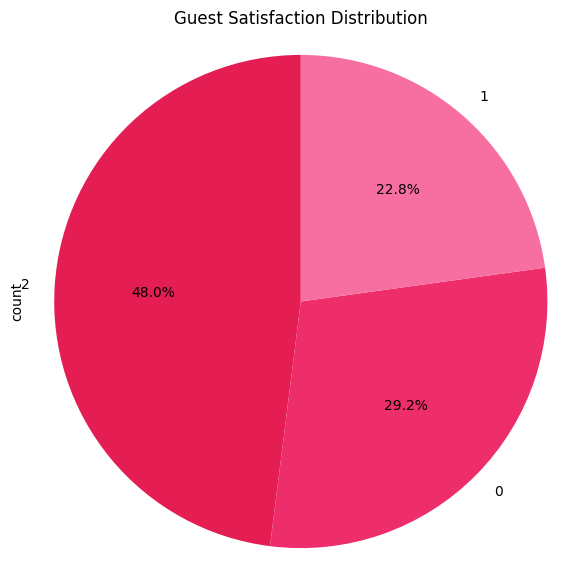

In [805]:
plt.figure(figsize=(7, 7))
df['guest_satisfaction'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], 
    startangle=90
)
plt.axis('equal')
plt.title('Guest Satisfaction Distribution')
plt.show()


In [806]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

### **Linear Models**

#### **I) Logistic Regression**

In [807]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score


logistic_reg = LogisticRegression(random_state=0)


cv_scores = cross_val_score(logistic_reg, x, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")

start_train = time.time()
logistic_reg.fit(X_train, y_train)
end_train = time.time()
train_time_log = end_train - start_train
print(f"Training Time: {train_time_log:.4f} seconds")

train_score = logistic_reg.score(X_train, y_train)
print(f"Training Accuracy Score: {train_score:.4f}")

start_test = time.time()
y_pred_log = logistic_reg.predict(X_test)
end_test = time.time()
test_time_log = end_test - start_test
print(f"Test Time: {test_time_log:.4f} seconds")

test_score_log = accuracy_score(y_test, y_pred_log)
print(f"Test Accuracy Score: {test_score_log:.4f}")
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_log))



Cross-Validation Accuracy Scores: [0.52148997 0.52722063 0.51805158 0.51747851 0.51834862]
Average Cross-Validation Accuracy: 0.5205
Training Time: 0.1335 seconds
Training Accuracy Score: 0.5581
Test Time: 0.0000 seconds
Test Accuracy Score: 0.5696
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61       510
           1       0.39      0.40      0.40       386
           2       0.69      0.57      0.62       849

    accuracy                           0.57      1745
   macro avg       0.54      0.56      0.54      1745
weighted avg       0.58      0.57      0.57      1745



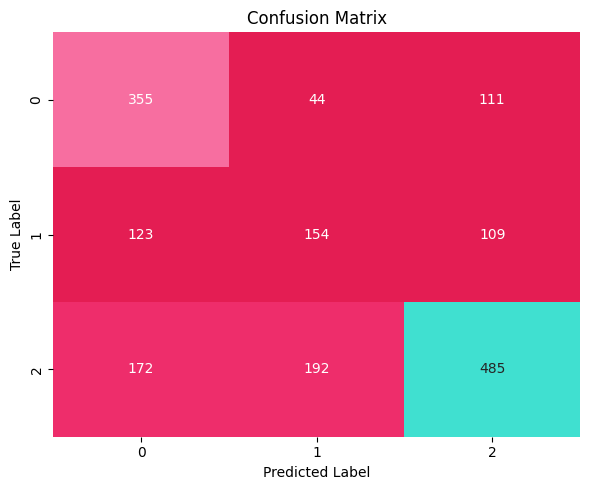

In [808]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


### **Support Vector Classifier (SVC)**

In [809]:
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

param_grid_svc = {
    'C': [1, 10, 100],                
    'kernel': ['rbf', 'poly', 'sigmoid']  
}

svc = SVC(class_weight='balanced')         

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)  

grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=cv, scoring='accuracy', n_jobs=-1)

start_train = time.time()
grid_search_svc.fit(X_train, y_train)
end_train = time.time()
train_time_svc = end_train - start_train
print(f"Total Training Time (SVC): {train_time_svc:.4f} seconds")

best_params_svc = grid_search_svc.best_params_
print(f"Best parameters (SVC): {best_params_svc}")
best_score_svc = grid_search_svc.best_score_
print(f"Best CV score (Accuracy) (SVC): {best_score_svc:.4f}")

best_svc_model = grid_search_svc.best_estimator_

train_accuracy_svc = best_svc_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_svc:.4f}")

start_test = time.time()
y_pred_svc = best_svc_model.predict(X_test)
end_test = time.time()
test_time_svc = end_test - start_test
print(f"Total Test Time (SVC): {test_time_svc:.4f} seconds")

print("Test Accuracy Score (SVC):")
print(accuracy_score(y_test, y_pred_svc))
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

Total Training Time (SVC): 23.0768 seconds
Best parameters (SVC): {'C': 100, 'kernel': 'rbf'}
Best CV score (Accuracy) (SVC): 0.6097
Training Accuracy Score: 0.6606
Total Test Time (SVC): 0.7658 seconds
Test Accuracy Score (SVC):
0.5828080229226361
Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       510
           1       0.38      0.42      0.40       386
           2       0.69      0.63      0.66       849

    accuracy                           0.58      1745
   macro avg       0.55      0.56      0.56      1745
weighted avg       0.59      0.58      0.59      1745



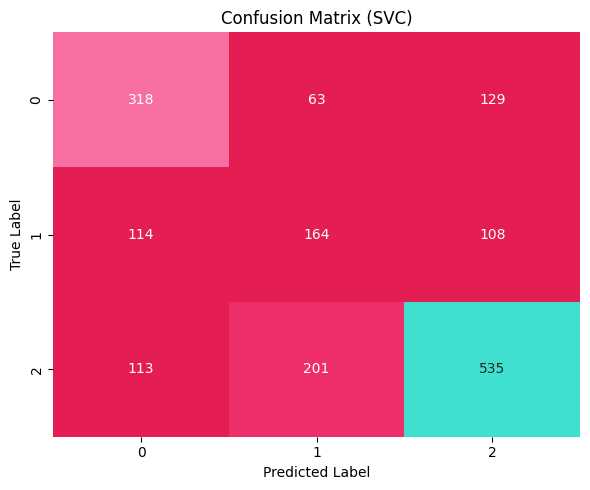

In [810]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVC)')
plt.tight_layout()
plt.show()

### **Ensemble models**

#### **1) Bagging models**

##### **Random forest**

In [811]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_rf = {
    'n_estimators': [50, 100,200],  
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5,10], 
    'min_samples_leaf': [1, 2]  
}

rf = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

start_train = time.time()
grid_search_rf.fit(X_train, y_train)
end_train = time.time()
train_time_rf = end_train - start_train
print(f"Total Training Time (RandomForest): {train_time_rf:.4f} seconds")

best_params_rf = grid_search_rf.best_params_
print(f"Best parameters (RandomForest): {best_params_rf}")
best_score_rf = grid_search_rf.best_score_
print(f"Best CV score (Accuracy) (RandomForest): {best_score_rf:.4f}")

best_rf_model = grid_search_rf.best_estimator_

train_accuracy_rf = best_rf_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_rf:.4f}")

start_test = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_test = time.time()
test_time_rf = end_test - start_test
print(f"Total Test Time (RandomForest): {test_time_rf:.4f} seconds")

print("Test Accuracy Score (RandomForest):")
print(accuracy_score(y_test, y_pred_rf))
print("Classification Report (RandomForest):")
print(classification_report(y_test, y_pred_rf))



Total Training Time (RandomForest): 21.2400 seconds
Best parameters (RandomForest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score (Accuracy) (RandomForest): 0.7181
Training Accuracy Score: 0.9978
Total Test Time (RandomForest): 0.0562 seconds
Test Accuracy Score (RandomForest):
0.6114613180515759
Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.59      0.60      0.59       510
           1       0.43      0.36      0.39       386
           2       0.69      0.74      0.71       849

    accuracy                           0.61      1745
   macro avg       0.57      0.56      0.56      1745
weighted avg       0.60      0.61      0.61      1745



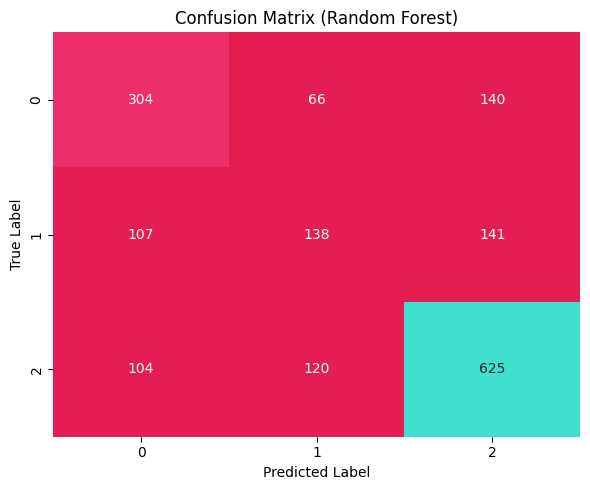

In [812]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()

##### **Decision tree**

In [813]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=0)

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

start_train = time.time()
grid_search_dt.fit(X_train, y_train)
end_train = time.time()
train_time_dt = end_train - start_train
print(f"Total Training Time (DecisionTree): {train_time_dt:.4f} seconds")

best_params_dt = grid_search_dt.best_params_
print(f"Best parameters (DecisionTree): {best_params_dt}")
best_score_dt = grid_search_dt.best_score_
print(f"Best CV score (Accuracy) (DecisionTree): {best_score_dt:.4f}")

best_dt_model = grid_search_dt.best_estimator_

train_accuracy_dt = best_dt_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_dt:.4f}")

start_test = time.time()
y_pred_dt = best_dt_model.predict(X_test)
end_test = time.time()
test_time_dt = end_test - start_test
print(f"Total Test Time (DecisionTree): {test_time_dt:.4f} seconds")

print("Test Accuracy Score (DecisionTree):")
print(accuracy_score(y_test, y_pred_dt))
print("Classification Report (DecisionTree):")
print(classification_report(y_test, y_pred_dt))

Total Training Time (DecisionTree): 3.4292 seconds
Best parameters (DecisionTree): {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV score (Accuracy) (DecisionTree): 0.6279
Training Accuracy Score: 0.9367
Total Test Time (DecisionTree): 0.0000 seconds
Test Accuracy Score (DecisionTree):
0.5432664756446991
Classification Report (DecisionTree):
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       510
           1       0.36      0.40      0.38       386
           2       0.66      0.59      0.62       849

    accuracy                           0.54      1745
   macro avg       0.52      0.52      0.52      1745
weighted avg       0.55      0.54      0.55      1745



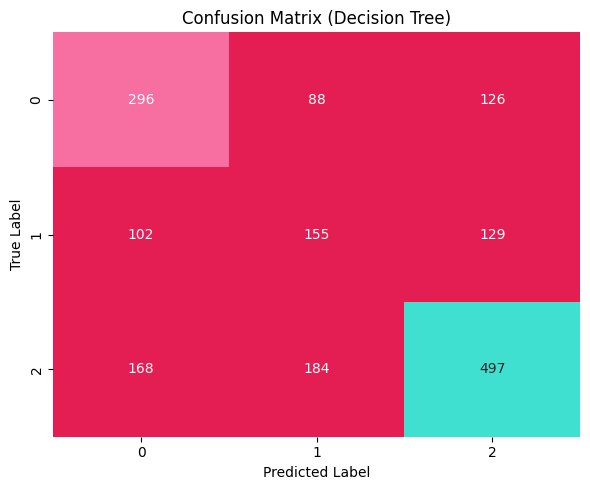

In [814]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.tight_layout()
plt.show()

#### **2) Boosting models**

##### **XG boost**

In [815]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# study = optuna.create_study(direction='maximize')

# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     max_depth = trial.suggest_int('max_depth', 3, 10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
#     subsample = trial.suggest_float('subsample', 0.7, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)
    
#     xgb_model = XGBClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         use_label_encoder=False,
#         eval_metric='mlogloss',
#         random_state=0,
#         verbosity=0
#     )
    
#     xgb_model.fit(X_train, y_train)
#     y_pred = xgb_model.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# study.optimize(objective, n_trials=10)

# best_params_xgb = study.best_params
# best_score_xgb = study.best_value

# print(f"Best parameters (Optuna): {best_params_xgb}")
# print(f"Highest Accuracy on Test Set: {best_score_xgb:.4f}")




In [816]:
# [I 2025-05-16 02:46:24,757] A new study created in memory with name: no-name-d0360e8a-7902-4845-ac5a-83a8ea126c19
# [I 2025-05-16 02:46:24,965] Trial 0 finished with value: 0.622349570200573 and parameters: {'n_estimators': 69, 'max_depth': 6, 'learning_rate': 0.05110398465973371, 'subsample': 0.9752943494937527, 'colsample_bytree': 0.9262754987963975}. Best is trial 0 with value: 0.622349570200573.
# [I 2025-05-16 02:46:25,772] Trial 1 finished with value: 0.6143266475644699 and parameters: {'n_estimators': 132, 'max_depth': 8, 'learning_rate': 0.18692365123948573, 'subsample': 0.7388230253400159, 'colsample_bytree': 0.7293018102196923}. Best is trial 0 with value: 0.622349570200573.
# [I 2025-05-16 02:46:26,064] Trial 2 finished with value: 0.6349570200573066 and parameters: {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.10063569413953903, 'subsample': 0.7773356344475959, 'colsample_bytree': 0.9268996994266611}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:26,281] Trial 3 finished with value: 0.6206303724928367 and parameters: {'n_estimators': 68, 'max_depth': 6, 'learning_rate': 0.06085638181092623, 'subsample': 0.8041635186830433, 'colsample_bytree': 0.7903200618500288}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:26,663] Trial 4 finished with value: 0.6263610315186247 and parameters: {'n_estimators': 133, 'max_depth': 6, 'learning_rate': 0.04415981247849824, 'subsample': 0.7327821870209162, 'colsample_bytree': 0.7225896839901864}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:27,344] Trial 5 finished with value: 0.6074498567335244 and parameters: {'n_estimators': 182, 'max_depth': 7, 'learning_rate': 0.14691274191595927, 'subsample': 0.9070698706559017, 'colsample_bytree': 0.9400669504206506}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:28,557] Trial 6 finished with value: 0.6057306590257879 and parameters: {'n_estimators': 186, 'max_depth': 10, 'learning_rate': 0.19164690638310297, 'subsample': 0.7412547173327826, 'colsample_bytree': 0.7519020399067048}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:29,118] Trial 7 finished with value: 0.625214899713467 and parameters: {'n_estimators': 92, 'max_depth': 9, 'learning_rate': 0.08902027637916997, 'subsample': 0.9334115868716821, 'colsample_bytree': 0.7218613985705125}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:29,325] Trial 8 finished with value: 0.6292263610315186 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.101664822647215, 'subsample': 0.7849784327906421, 'colsample_bytree': 0.9276783079008026}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 02:46:29,579] Trial 9 finished with value: 0.6143266475644699 and parameters: {'n_estimators': 56, 'max_depth': 7, 'learning_rate': 0.016086267280765596, 'subsample': 0.7173318557230526, 'colsample_bytree': 0.8098342573293884}. Best is trial 2 with value: 0.6349570200573066.
# Best parameters (Optuna): {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.10063569413953903, 'subsample': 0.7773356344475959, 'colsample_bytree': 0.9268996994266611}
# Highest Accuracy on Test Set: 0.6350

In [817]:
import time
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(
    n_estimators=75,
    max_depth=6,
    learning_rate=0.10063569413953903,
    subsample=0.7773356344475959,
    colsample_bytree=0.9268996994266611,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    verbosity=0
)

cv_scores_xgb = cross_val_score(xgb_model, x, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-Validation Accuracy Scores: {cv_scores_xgb}")
print(f"Average Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f}")

start_train = time.time()
xgb_model.fit(X_train, y_train)
end_train = time.time()
train_time_xgb = end_train - start_train
print(f"Total Training Time (XGBoost): {train_time_xgb:.4f} seconds")

train_accuracy_xgb = xgb_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_xgb:.4f}")

start_test = time.time()
y_pred_xgb = xgb_model.predict(X_test)
end_test = time.time()
test_time_xgb = end_test - start_test
print(f"Total Test Time (XGBoost): {test_time_xgb:.4f} seconds")

print("Test Accuracy Score (XGBoost):")
print(accuracy_score(y_test, y_pred_xgb))
print("Test Set Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))




Cross-Validation Accuracy Scores: [0.6252149  0.62406877 0.64469914 0.64011461 0.64965596]
Average Cross-Validation Accuracy: 0.6368
Total Training Time (XGBoost): 0.3306 seconds
Training Accuracy Score: 0.7998
Total Test Time (XGBoost): 0.0024 seconds
Test Accuracy Score (XGBoost):
0.6257879656160459
Test Set Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       510
           1       0.45      0.38      0.42       386
           2       0.71      0.72      0.72       849

    accuracy                           0.63      1745
   macro avg       0.59      0.58      0.58      1745
weighted avg       0.62      0.63      0.62      1745



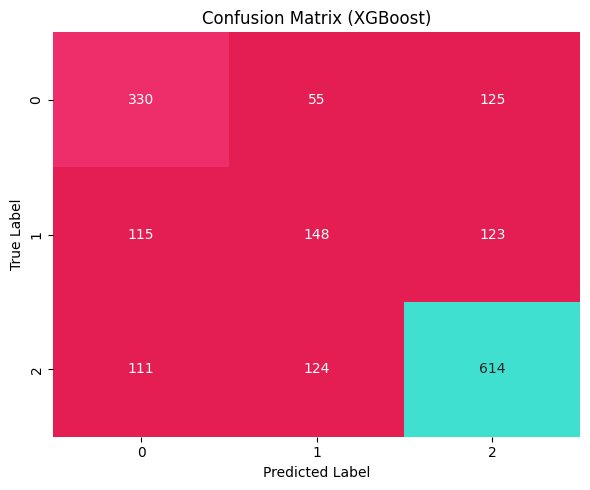

In [818]:
cm = confusion_matrix(y_test, y_pred_xgb)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.tight_layout()
plt.show()

##### **Cat boost**

In [819]:
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# study = optuna.create_study(direction='maximize')

# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 200),
#         'depth': trial.suggest_int('depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#         'random_strength': trial.suggest_float('random_strength', 0.5, 2.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'verbose': 0,
#         'random_seed': 0
#     }
    
#     model = CatBoostClassifier(**params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# study.optimize(objective, n_trials=10)

# best_params_cb = study.best_params
# best_score_cb = study.best_value

# print(f"Best parameters (Optuna - CatBoost): {best_params_cb}")
# print(f"Highest Accuracy on Test Set: {best_score_cb:.4f}")




In [820]:
# [I 2025-05-16 04:37:01,330] A new study created in memory with name: no-name-ad812ad5-d04b-4581-8557-41e1fbd0405e
# [I 2025-05-16 04:37:01,907] Trial 0 finished with value: 0.625214899713467 and parameters: {'iterations': 198, 'depth': 3, 'learning_rate': 0.14892236595521724, 'l2_leaf_reg': 9.989711296457273, 'random_strength': 0.6576588148459105, 'bagging_temperature': 0.7403295767941537, 'border_count': 204}. Best is trial 0 with value: 0.625214899713467.
# [I 2025-05-16 04:37:03,489] Trial 1 finished with value: 0.5902578796561605 and parameters: {'iterations': 61, 'depth': 10, 'learning_rate': 0.027913410096504707, 'l2_leaf_reg': 4.332290112939615, 'random_strength': 1.6099396061377291, 'bagging_temperature': 0.7617001762094666, 'border_count': 55}. Best is trial 0 with value: 0.625214899713467.
# [I 2025-05-16 04:37:04,157] Trial 2 finished with value: 0.6349570200573066 and parameters: {'iterations': 156, 'depth': 5, 'learning_rate': 0.1594827161532743, 'l2_leaf_reg': 6.544844148450393, 'random_strength': 1.7448624019847634, 'bagging_temperature': 0.5394298973201219, 'border_count': 208}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:06,229] Trial 3 finished with value: 0.6166189111747851 and parameters: {'iterations': 93, 'depth': 8, 'learning_rate': 0.07364156316194137, 'l2_leaf_reg': 6.612101588382002, 'random_strength': 1.5573533384388147, 'bagging_temperature': 0.0026992318416428907, 'border_count': 220}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:09,554] Trial 4 finished with value: 0.6183381088825215 and parameters: {'iterations': 89, 'depth': 10, 'learning_rate': 0.18378382991133008, 'l2_leaf_reg': 3.4076950220110787, 'random_strength': 0.843553547515375, 'bagging_temperature': 0.41447044696465885, 'border_count': 93}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:09,805] Trial 5 finished with value: 0.5455587392550143 and parameters: {'iterations': 63, 'depth': 3, 'learning_rate': 0.019558042001197387, 'l2_leaf_reg': 1.1379475347607657, 'random_strength': 0.9220270678755593, 'bagging_temperature': 0.49569981371269034, 'border_count': 162}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:11,146] Trial 6 finished with value: 0.6200573065902579 and parameters: {'iterations': 68, 'depth': 8, 'learning_rate': 0.17623287320587833, 'l2_leaf_reg': 6.3474729914667485, 'random_strength': 1.2466208863830404, 'bagging_temperature': 0.9613876114461093, 'border_count': 182}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:11,924] Trial 7 finished with value: 0.6257879656160459 and parameters: {'iterations': 139, 'depth': 6, 'learning_rate': 0.0886117478760438, 'l2_leaf_reg': 6.346489719437108, 'random_strength': 1.8855627409312947, 'bagging_temperature': 0.5006527296618494, 'border_count': 150}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:15,061] Trial 8 finished with value: 0.6240687679083095 and parameters: {'iterations': 172, 'depth': 8, 'learning_rate': 0.03413898039512192, 'l2_leaf_reg': 1.6917672171871214, 'random_strength': 0.5300435980426528, 'bagging_temperature': 0.6985938390259134, 'border_count': 189}. Best is trial 2 with value: 0.6349570200573066.
# [I 2025-05-16 04:37:15,282] Trial 9 finished with value: 0.5553008595988539 and parameters: {'iterations': 60, 'depth': 3, 'learning_rate': 0.0294071961408148, 'l2_leaf_reg': 9.359775971984837, 'random_strength': 0.8639164044912595, 'bagging_temperature': 0.03877112635389568, 'border_count': 220}. Best is trial 2 with value: 0.6349570200573066.
# Best parameters (Optuna - CatBoost): {'iterations': 156, 'depth': 5, 'learning_rate': 0.1594827161532743, 'l2_leaf_reg': 6.544844148450393, 'random_strength': 1.7448624019847634, 'bagging_temperature': 0.5394298973201219, 'border_count': 208}
# Highest Accuracy on Test Set: 0.6350

In [821]:
import time
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

cat_model = CatBoostClassifier(
    depth=5,
    iterations=156,
    learning_rate=0.1594827161532743,
    l2_leaf_reg=6.544844148450393,
    bagging_temperature=0.5394298973201219,
    random_strength=1.7448624019847634,
    border_count=208,
    random_state=0,
    verbose=0
)

cv_scores_cat = cross_val_score(cat_model, x, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-Validation Accuracy Scores: {cv_scores_cat}")
print(f"Average Cross-Validation Accuracy: {cv_scores_cat.mean():.4f}")

start_train = time.time()
cat_model.fit(X_train, y_train)
end_train = time.time()
train_time_cat = end_train - start_train
print(f"Total Training Time (CatBoost): {train_time_cat:.4f} seconds")

train_accuracy_cat = cat_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_cat:.4f}")

start_test = time.time()
y_pred_cat = cat_model.predict(X_test)
end_test = time.time()
test_time_cat = end_test - start_test
print(f"Total Test Time (CatBoost): {test_time_cat:.4f} seconds")

print("Test Accuracy Score (CatBoost):")
print(accuracy_score(y_test, y_pred_cat))
print("Classification Report (CatBoost):")
print(classification_report(y_test, y_pred_cat))



Cross-Validation Accuracy Scores: [0.6286533  0.6252149  0.63896848 0.63381089 0.6559633 ]
Average Cross-Validation Accuracy: 0.6365
Total Training Time (CatBoost): 0.6713 seconds
Training Accuracy Score: 0.7413
Total Test Time (CatBoost): 0.0056 seconds
Test Accuracy Score (CatBoost):
0.6332378223495702
Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       510
           1       0.46      0.39      0.42       386
           2       0.72      0.73      0.72       849

    accuracy                           0.63      1745
   macro avg       0.59      0.59      0.59      1745
weighted avg       0.63      0.63      0.63      1745



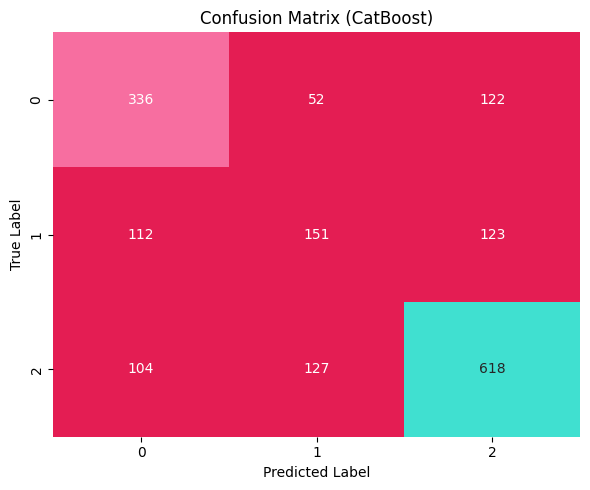

In [822]:
cm = confusion_matrix(y_test, y_pred_cat)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CatBoost)')
plt.tight_layout()
plt.show()

##### **Light gbm**

In [823]:
# import optuna
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'random_state': 0
#     }

#     model = LGBMClassifier(**params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)

# best_params_lgb = study.best_params
# best_score_lgb = study.best_value
# print(f"Best parameters (Optuna - LightGBM): {best_params_lgb}")
# print(f"Highest Accuracy on Test Set: {best_score_lgb:.4f}")


In [824]:
# Best parameters (Optuna - LightGBM): {'n_estimators': 172, 'max_depth': 5, 'learning_rate': 0.04485202298566927, 'num_leaves': 103, 'min_child_samples': 43, 'subsample': 0.6353937353165494, 'colsample_bytree': 0.8161981454506166}
# Highest Accuracy on Test Set: 0.6372

In [825]:
import time
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

light_model = LGBMClassifier(
    n_estimators=172,
    num_leaves=103,
    learning_rate=0.04485202298566927,
    max_depth=5,
    min_child_samples=43,
    subsample=0.6353937353165494,
    random_state=0,
    colsample_bytree=0.8161981454506166
)

cv_scores_light = cross_val_score(light_model, x, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-Validation Accuracy Scores: {cv_scores_light}")
print(f"Average Cross-Validation Accuracy: {cv_scores_light.mean():.4f}")

start_train = time.time()
light_model.fit(X_train, y_train)
end_train = time.time()
train_time_light = end_train - start_train
print(f"Total Training Time (LightGBM): {train_time_light:.4f} seconds")

train_accuracy_light = light_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_light:.4f}")

start_test = time.time()
y_pred_light = light_model.predict(X_test)
end_test = time.time()
test_time_light = end_test - start_test
print(f"Total Test Time (LightGBM): {test_time_light:.4f} seconds")

print("Test Accuracy Score (LightGBM):")
print(accuracy_score(y_test, y_pred_light))
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_light))


Cross-Validation Accuracy Scores: [0.63667622 0.63094556 0.64756447 0.64183381 0.65080275]
Average Cross-Validation Accuracy: 0.6416
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5171
[LightGBM] [Info] Number of data points in the train set: 10017, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

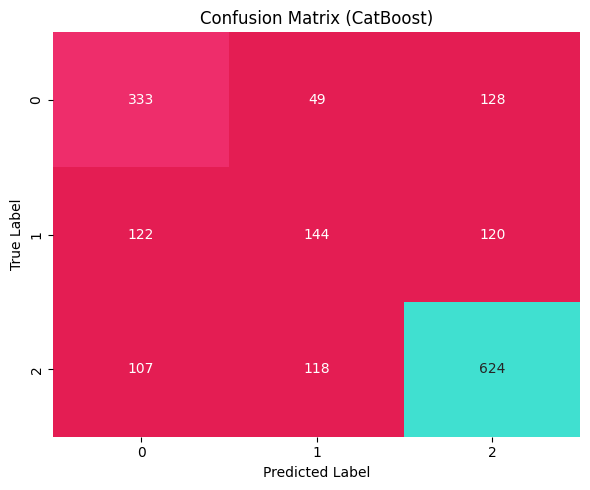

In [826]:
cm = confusion_matrix(y_test,  y_pred_light)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CatBoost)')
plt.tight_layout()
plt.show()

#### **3) Stacking model**

##### **Stacking Classifier Model with CatBoost, LightGBM, and XGBoost**

In [827]:
import time
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

lgb_model = LGBMClassifier(
    n_estimators=1534,
    learning_rate=0.010382774494101006,
    max_depth=3,
    reg_lambda=35,
    subsample=0.8148197144286347,
    subsample_freq=5,
    random_state=0
)

cat_model = CatBoostClassifier(
    depth=4,
    iterations=2197,
    learning_rate=0.009439768196125256,
    l2_leaf_reg=58,
    bagging_temperature=1.0063058598329384,
    random_state=0,
    verbose=0
)

meta_model = XGBClassifier(
    n_estimators=160,
    max_depth=3,
    learning_rate=0.09290850356426546,
    subsample=0.9207555916472224,
    colsample_bytree=0.9449957597418881,
    random_state=0,
    verbosity=0
)

stacked_model3 = StackingClassifier(
    estimators=[('lightgbm', lgb_model), ('catboost', cat_model)],
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1,
    passthrough=True  
)

start_train_stack = time.time()
stacked_model3.fit(X_train, y_train)
end_train_stack = time.time()
train_time_stack = end_train_stack - start_train_stack
print(f"Total Training Time (Stacking): {train_time_stack:.4f} seconds")

train_accuracy_stack = stacked_model3.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_stack:.4f}")

start_test_stack = time.time()
y_pred_stack3 = stacked_model3.predict(X_test)
end_test_stack = time.time()
test_time_stack = end_test_stack - start_test_stack
print(f"Total Test Time (Stacking): {test_time_stack:.4f} seconds")


print("Test Accuracy Score (Stacking):")
print(accuracy_score(y_test, y_pred_stack3))
print("Classification Report (Stacking):")
print(classification_report(y_test, y_pred_stack3))




Total Training Time (Stacking): 24.5682 seconds
Training Accuracy Score: 0.7253
Total Test Time (Stacking): 0.0583 seconds
Test Accuracy Score (Stacking):
0.6469914040114613
Classification Report (Stacking):
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       510
           1       0.51      0.34      0.41       386
           2       0.70      0.80      0.75       849

    accuracy                           0.65      1745
   macro avg       0.61      0.59      0.59      1745
weighted avg       0.63      0.65      0.63      1745



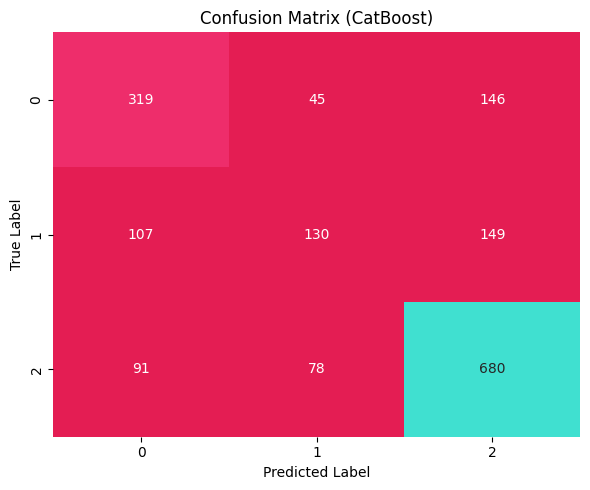

In [828]:
cm = confusion_matrix(y_test,  y_pred_stack3)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CatBoost)')
plt.tight_layout()
plt.show()

#### **4) Voting model**

##### **Voting Classifier Model with CatBoost, LightGBM, and XGBoost**

In [829]:
import time
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

lgb_model = LGBMClassifier(
    n_estimators=172,
    num_leaves=103,
    learning_rate=0.04485202298566927,
    max_depth=5,
    min_child_samples=43,
    subsample=0.6353937353165494,
    random_state=0,
    colsample_bytree=0.8161981454506166
)

cat_model = CatBoostClassifier(
    depth=5,
    iterations=156,
    learning_rate=0.1594827161532743,
    l2_leaf_reg=6.544844148450393,
    bagging_temperature=0.5394298973201219,
    random_strength=1.7448624019847634,
    border_count=208,
    random_state=0,
    verbose=0
)

xgb_model = XGBClassifier(
    n_estimators=75,
    max_depth=6,
    learning_rate=0.10063569413953903,
    subsample=0.7773356344475959,
    colsample_bytree=0.9268996994266611,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0,
    verbosity=0
)

voting_model = VotingClassifier(
    estimators=[('lightgbm', lgb_model), ('catboost', cat_model), ('xgboost', xgb_model)],
    voting='soft', 
    n_jobs=-1,

)

start_train_vote = time.time()
voting_model.fit(X_train, y_train)
end_train_vote = time.time()
train_time_vote = end_train_vote - start_train_vote
print(f"Total Training Time (Voting): {train_time_vote:.4f} seconds")

train_accuracy_vote = voting_model.score(X_train, y_train)
print(f"Training Accuracy Score: {train_accuracy_vote:.4f}")

start_test_vote = time.time()
y_pred_vote = voting_model.predict(X_test)
end_test_vote = time.time()
test_time_vote = end_test_vote - start_test_vote
print(f"Total Test Time (Voting): {test_time_vote:.4f} seconds")

print("Test Accuracy Score (Voting):")
print(accuracy_score(y_test, y_pred_vote))

print("Classification Report (Voting):")
print(classification_report(y_test, y_pred_vote))



Total Training Time (Voting): 3.1562 seconds
Training Accuracy Score: 0.7695
Total Test Time (Voting): 0.0207 seconds
Test Accuracy Score (Voting):
0.633810888252149
Classification Report (Voting):
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       510
           1       0.47      0.39      0.42       386
           2       0.71      0.73      0.72       849

    accuracy                           0.63      1745
   macro avg       0.60      0.59      0.59      1745
weighted avg       0.63      0.63      0.63      1745



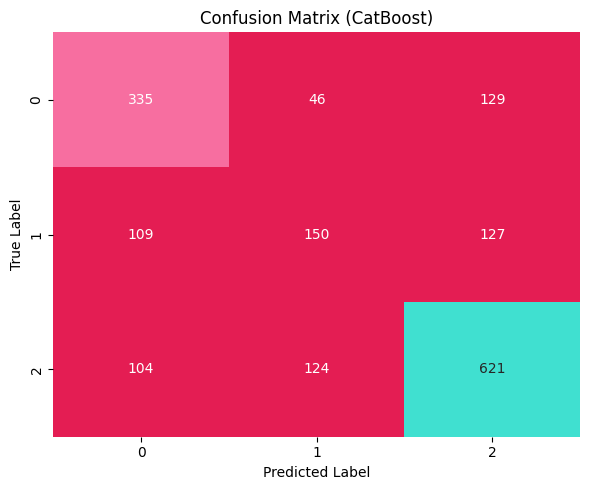

In [830]:
cm = confusion_matrix(y_test,  y_pred_vote)
custom_cmap = sns.color_palette(['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'], as_cmap=True)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CatBoost)')
plt.tight_layout()
plt.show()

### **Model Accuracy Comparison**

In [831]:
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'SVC': accuracy_score(y_test, y_pred_svc),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'CatBoost': accuracy_score(y_test, y_pred_cat),
    'LightGBM': accuracy_score(y_test, y_pred_light),
    'Stacking': accuracy_score(y_test, y_pred_stack3),
    'Voting': accuracy_score(y_test, y_pred_vote)
}

#### **Accuracy Score**

In [832]:
accuracy_scores = {model: round(results[model], 4) for model in results}
accuracy_table = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])
print("Accuracy Scores Table:")
accuracy_table

Accuracy Scores Table:


,Model,Accuracy Score
0,Logistic Regression,0.5696
1,SVC,0.5828
2,Random Forest,0.6115
3,Decision Tree,0.5433
4,XGBoost,0.6258
5,CatBoost,0.6332
6,LightGBM,0.6309
7,Stacking,0.6470
8,Voting,0.6338


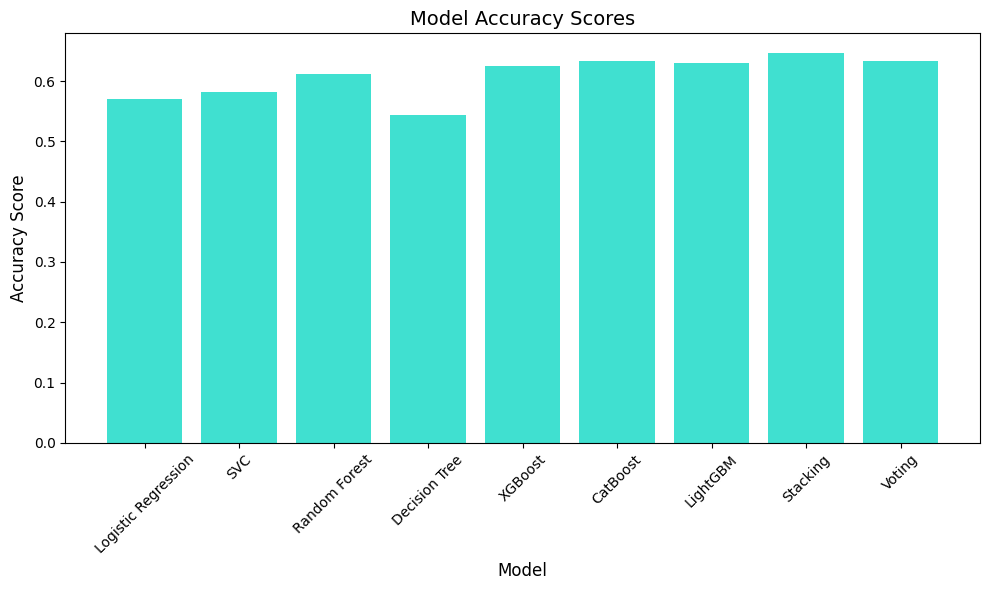

In [833]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='#40E0D0')
plt.title('Model Accuracy Scores', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Model Time Comparison**

#### **Training Time**

In [834]:
train_times = {
    'Logistic Regression': train_time_log,
    'SVC': train_time_svc,
    'Random Forest': train_time_rf,
    'Decision Tree': train_time_dt,
    'XGBoost': train_time_xgb,
    'CatBoost': train_time_cat,
    'LightGBM': train_time_light,
    'Stacking': train_time_stack,
    'Voting': train_time_vote
}


In [835]:
train_times = {model:train_times[model] for model in train_times}
train_times_table = pd.DataFrame(list(train_times.items()), columns=['Model', 'Training Time (seconds)'])
print("Training Times Table:")
train_times_table

Training Times Table:


,Model,Training Time (seconds)
0,Logistic Regression,0.133522
1,SVC,23.076761
2,Random Forest,21.240036
3,Decision Tree,3.429231
4,XGBoost,0.330573
5,CatBoost,0.671253
6,LightGBM,0.466891
7,Stacking,24.568236
8,Voting,3.156214


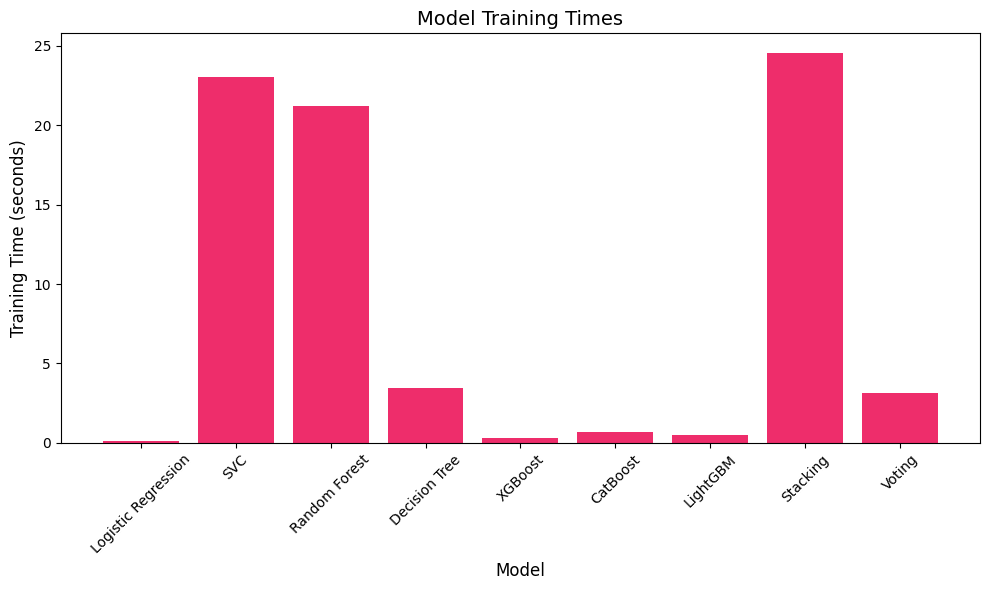

In [836]:
plt.figure(figsize=(10, 6))
plt.bar(train_times.keys(), train_times.values(), color='#EE2D6B', label='Training Time')
plt.title('Model Training Times', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Testing Time**

In [837]:
test_times = {
    'Logistic Regression': test_time_log,
    'SVC': test_time_svc,
    'Random Forest': test_time_rf,
    'Decision Tree': test_time_dt,
    'XGBoost': test_time_xgb,
    'CatBoost': test_time_cat,
    'LightGBM': test_time_light,
    'Stacking': test_time_stack,
    'Voting': test_time_vote
}

In [838]:
test_times = {model: test_times[model] for model in test_times}
test_times_table = pd.DataFrame(list(test_times.items()), columns=['Model', 'Testing Time (seconds)'])
print("Testing Times Table:")
test_times_table

Testing Times Table:


,Model,Testing Time (seconds)
0,Logistic Regression,0.000000
1,SVC,0.765759
2,Random Forest,0.056248
3,Decision Tree,0.000000
4,XGBoost,0.002397
5,CatBoost,0.005621
6,LightGBM,0.008806
7,Stacking,0.058350
8,Voting,0.020729


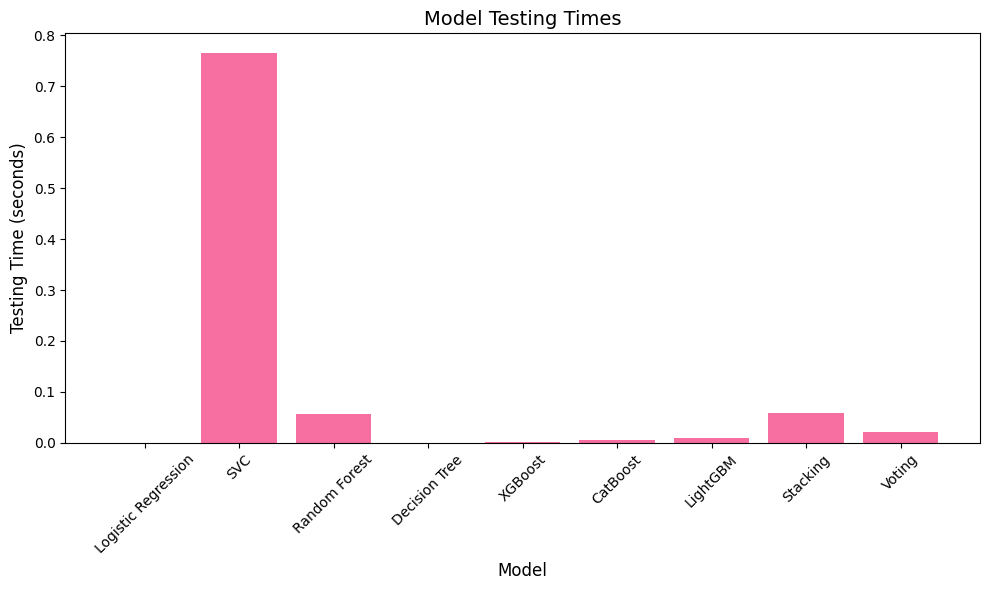

In [839]:
plt.figure(figsize=(10, 6))
plt.bar(test_times.keys(), test_times.values(), color='#F76EA0', label='Testing Time')
plt.title('Model Testing Times', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Testing Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Saving Models Using Joblib**

### **TFidf**

In [ ]:
# import joblib
# joblib.dump(summary_tfidf, "classification_models/summary_tfidf_vectorizer")
# joblib.dump(space_tfidf, "classification_models/space_tfidf_vectorizer")
# joblib.dump(description_tfidf, "classification_models/description_tfidf_vectorizer")
# joblib.dump(notes_tfidf, "classification_models/notes_tfidf_vectorizer")
# joblib.dump(transit_tfidf, "classification_models/transit_tfidf_vectorizer")
# joblib.dump(access_tfidf, "classification_models/access_tfidf_vectorizer")
# joblib.dump(house_rules_tfidf, "classification_models/house_rules_tfidf_vectorizer")

['classification_models/house_rules_tfidf_vectorizer']

### **SVD**

In [ ]:
# joblib.dump(svd_summary, "classification_models/svd_summary_model")
# joblib.dump(svd_space, "classification_models/svd_space_model")
# joblib.dump(svd_transit, "classification_models/svd_transit_model")
# joblib.dump(svd_access, "classification_models/svd_access_model")
# joblib.dump(svd_description, "classification_models/svd_description_model")
# joblib.dump(svd_notes, "classification_models/svd_notes_model")
# joblib.dump(svd_house_rules, "classification_models/svd_house_rules_model")

['classification_models/svd_house_rules_model']

### **Label Encoder**

In [ ]:
# joblib.dump(label_encoders, 'classification_models/label_encoders')

['classification_models/label_encoders']

### **Scaler**

In [ ]:
# joblib.dump(scaler, 'classification_models/scaler')

['classification_models/scaler']

### **Model**

In [ ]:
# joblib.dump(stacked_model3, 'classification_models/model')

['classification_models/model']

## **Conclusion**

#### **Classification Model Evaluation Summary (Updated)**

- The **Stacking model** achieved the highest **accuracy score (0.6470)**, making it the most effective model for this classification task.
- **CatBoost** (**0.6332**), **Voting Ensemble** (**0.6338**), **LightGBM** (**0.6309**), and **XGBoost** (**0.6258**) followed closely, reaffirming that **gradient boosting** and **ensemble methods** consistently deliver top-tier performance.
- **Random Forest** achieved a solid accuracy (**0.6115**), outperforming base models but still trailing behind boosting and stacked models.
- **SVC** (**0.5828**) and **Logistic Regression** (**0.5696**) offered modest performance, better than Decision Tree but not competitive overall.
- **Decision Tree** had the lowest accuracy (**0.5433**), indicating limited generalization ability for this dataset.

---

#### **Efficiency Comparison**

- **Voting** and **boosting models** (XGBoost, CatBoost, LightGBM) provided **a strong tradeoff between accuracy and computational efficiency**, making them viable for real-time or resource-limited scenarios.
- **Stacking**, while most accurate, typically involves **higher training and inference time**, which suits batch processing or offline predictions.
- **SVC** tends to have **long training time** and **lower comparative accuracy**, making it less suitable for this task.

---

#### **Key Insight**

> **Ensemble approaches** — particularly **Stacking**, **Voting**, and boosting methods like **CatBoost**, **LightGBM**, and **XGBoost** — consistently outperform traditional classifiers in both accuracy and robustness.  
> Simpler models such as **Logistic Regression** and **Decision Tree** underperform in this setting, supporting the conclusion that ensemble-based techniques are the **preferred solution for reliable and high-performing classification** on this dataset.



